In [99]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets

##Seaborn for fancy plots. 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd
from shapely.geometry import Point
#import fiona

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

import folium # mapping
from folium.plugins import HeatMap

In [100]:
df=pd.read_csv('3960_2016.csv', encoding_errors='ignore')
df.drop(['Descriptive Name'], axis=1, inplace =True)
df.drop(['Unnamed: 0'], axis=1, inplace =True)
#df['Avg_Temp']=(df['Air Temp. Avg. Max. (°C)']+df['Air Temp. Avg. Min. (°C)'])/2
df.drop(['Air Temp. Avg. Max. (°C)'], axis=1, inplace =True)
df.drop(['Air Temp. Avg. Min. (°C)'], axis=1, inplace =True)
df.drop(['NGH_Number'], axis=1, inplace =True)
df.drop(['DT_Year'], axis=1, inplace =True)
df.drop(['DT_Month'], axis=1, inplace =True)

df.rename(columns={'Edu_Preschool': 'Preschool', 'Edu_Kindergarten ':'Kindergarten', 'Edu_Gr.7 - Gr.9':'Gr7_Gr9'}, inplace=True)
df.rename(columns={'Edu_Gr.10 - Gr.12': 'Gr10_Gr12', 'Edu_Post Secondar':'Post_Secondary'}, inplace=True)
df.head()

,NGH_Name,Latitude,Longitude,Violation_Type,Sum_Occurrences,Preschool,Kindergarten,Gr7_Gr9,Gr10_Gr12,Post_Secondary,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,53.574143,-113.388758,Assault,4,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,53.574143,-113.388758,Assault,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,53.574143,-113.388758,Assault,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


In [101]:
df.columns

Index(['NGH_Name', 'Latitude', 'Longitude', 'Violation_Type',
       'Sum_Occurrences', 'Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12',
       'Post_Secondary', 'Homemaker', 'Employedage0-30', 'Employed 30+ ',
       'Unemployed', 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11132 entries, 0 to 11131
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NGH_Name                11132 non-null  object 
 1   Latitude                11132 non-null  float64
 2   Longitude               11132 non-null  float64
 3   Violation_Type          11132 non-null  object 
 4   Sum_Occurrences         11132 non-null  int64  
 5   Preschool               11113 non-null  float64
 6   Kindergarten            11113 non-null  float64
 7   Gr7_Gr9                 11113 non-null  float64
 8   Gr10_Gr12               11113 non-null  float64
 9   Post_Secondary          11113 non-null  float64
 10  Homemaker               11113 non-null  float64
 11  Employedage0-30         11113 non-null  float64
 12  Employed 30+            11113 non-null  float64
 13  Unemployed              11113 non-null  float64
 14  Retired                 11113 non-null

In [103]:
df.isnull().sum()

NGH_Name                   0
Latitude                   0
Longitude                  0
Violation_Type             0
Sum_Occurrences            0
Preschool                 19
Kindergarten              19
Gr7_Gr9                   19
Gr10_Gr12                 19
Post_Secondary            19
Homemaker                 19
Employedage0-30           19
Employed 30+              19
Unemployed                19
Retired                   19
Permanently U             19
Employment_No Response    19
Income_Less than $30,     19
Income_$30,000 to les     19
Income_$60,000 to les     19
Income_$100,000 to le     19
Income_$125,000 to le     19
Income_$150,000 to le     19
Income_$200,000 to le     19
Income_$250,000 or mo     19
Income_No Response        19
dtype: int64

In [104]:
# What are these neighborhoods that have these null values?
null_neighborhoods = df[df.isnull().any(axis=1)]['NGH_Name'].unique()
null_neighborhoods

array(['ASTER', 'DECOTEAU', "RIVER'S EDGE", 'THE UPLANDS'], dtype=object)

In [105]:
# make copy of original dataset df
df_copy=df.copy()

In [106]:
# Get rid of the non residential areas where we are getting null values
null_neighborhoods = df_copy[df_copy.isnull().any(axis=1)]['NGH_Name'].unique()
df_copy = df_copy[~df_copy['NGH_Name'].isin(null_neighborhoods)]
df_copy.isnull().sum()

NGH_Name                  0
Latitude                  0
Longitude                 0
Violation_Type            0
Sum_Occurrences           0
Preschool                 0
Kindergarten              0
Gr7_Gr9                   0
Gr10_Gr12                 0
Post_Secondary            0
Homemaker                 0
Employedage0-30           0
Employed 30+              0
Unemployed                0
Retired                   0
Permanently U             0
Employment_No Response    0
Income_Less than $30,     0
Income_$30,000 to les     0
Income_$60,000 to les     0
Income_$100,000 to le     0
Income_$125,000 to le     0
Income_$150,000 to le     0
Income_$200,000 to le     0
Income_$250,000 or mo     0
Income_No Response        0
dtype: int64

In [107]:
df_copy['Violation_Type'].value_counts()

Theft From Vehicle    2999
Break and Enter       2409
Theft Of Vehicle      2107
Assault               1934
Robbery                716
Sexual Assaults        543
Theft Over $5000       381
Homicide                24
Name: Violation_Type, dtype: int64

In [108]:
df_copy.describe()

,Latitude,Longitude,Sum_Occurrences,Preschool,Kindergarten,Gr7_Gr9,Gr10_Gr12,Post_Secondary,Homemaker,Employedage0-30,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
count,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,...,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000
mean,53.534495,-113.503449,2.535679,130.877711,167.029245,67.769639,56.901197,100.428597,71.141996,149.869972,...,1155.861244,133.869882,185.541708,180.655629,79.569153,48.586790,45.087285,18.323675,17.155044,719.476109
std,0.058864,0.078077,2.781491,132.198913,164.464642,60.997749,50.458302,158.738916,63.947275,118.742042,...,1131.229481,197.913557,194.515295,186.686130,85.396937,53.324445,54.436444,23.474115,27.823724,797.157981
min,53.399507,-113.701466,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.490156,-113.558327,1.000000,51.000000,58.000000,22.000000,18.000000,31.000000,28.000000,68.000000,...,434.000000,25.000000,60.000000,73.000000,30.000000,16.000000,11.000000,3.000000,2.000000,308.000000
50%,53.539767,-113.499421,2.000000,103.000000,139.000000,60.000000,48.000000,66.000000,60.000000,139.000000,...,959.000000,72.000000,152.000000,159.000000,62.000000,35.000000,28.000000,10.000000,5.000000,570.000000
75%,53.579205,-113.444355,3.000000,180.000000,231.000000,98.000000,83.000000,119.000000,96.000000,207.000000,...,1582.000000,152.000000,244.000000,237.000000,99.000000,63.000000,58.000000,25.000000,19.000000,924.000000
max,53.678364,-113.312513,43.000000,967.000000,1157.000000,353.000000,273.000000,1621.000000,398.000000,667.000000,...,7636.000000,1413.000000,1611.000000,1505.000000,537.000000,355.000000,393.000000,133.000000,145.000000,6716.000000


In [109]:
df_copy

,NGH_Name,Latitude,Longitude,Violation_Type,Sum_Occurrences,Preschool,Kindergarten,Gr7_Gr9,Gr10_Gr12,Post_Secondary,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,53.574143,-113.388758,Assault,4,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,53.574143,-113.388758,Assault,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,53.574143,-113.388758,Assault,1,159.0,189.0,64.0,52.0,43.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127,YOUNGSTOWN INDUSTRIAL,53.552476,-113.610588,Theft Of Vehicle,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11128,YOUNGSTOWN INDUSTRIAL,53.552476,-113.610588,Assault,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11129,YOUNGSTOWN INDUSTRIAL,53.552476,-113.610588,Assault,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11130,YOUNGSTOWN INDUSTRIAL,53.552476,-113.610588,Theft Over $5000,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
df_copy.columns

Index(['NGH_Name', 'Latitude', 'Longitude', 'Violation_Type',
       'Sum_Occurrences', 'Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12',
       'Post_Secondary', 'Homemaker', 'Employedage0-30', 'Employed 30+ ',
       'Unemployed', 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response'],
      dtype='object')

In [111]:
# Pivot the dataframe on NGH_Name and calculate the sum of occurrences for each Violation_Type
pivot_table = df_copy.pivot_table(index='NGH_Name', values='Sum_Occurrences', columns='Violation_Type', aggfunc='sum', fill_value=0, margins=False)

# Include the demographic columns in the pivot table
pivot_table = pd.concat([pivot_table, df_copy.groupby('NGH_Name')[['Latitude', 'Longitude', 'Preschool', 'Kindergarten', 'Gr7_Gr9', 'Gr10_Gr12',
       'Post_Secondary', 'Homemaker', 'Employedage0-30', 'Employed 30+ ',
       'Unemployed', 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response']].mean()], axis=1)

# Rename the columns
pivot_table.columns = ['Assault', 'Break and Enter', 'Homicide', 'Robbery', 'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker', 'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired', 'Permanently Unemployed', 'Employment_No Response', 'Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K', 'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K', 'Income_200K to less than 250K', 'Income_250K or more', 'Income_No Response']

# Print the pivot table
pivot_table



,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,Longitude,...,Employment_No Response,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response
NGH_Name,,,,,,,,,,,,,,,,,,,,,
ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,-113.388758,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
ALBANY,8,8,0,2,2,9,2,1,53.632382,-113.549464,...,445.0,10.0,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0
ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,-113.485119,...,2342.0,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0
ALBERTA PARK INDUSTRIAL,1,3,0,0,0,10,6,4,53.566735,-113.596472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALDERGROVE,17,19,0,6,4,46,23,0,53.516888,-113.641242,...,1110.0,119.0,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODCROFT,30,22,0,13,4,40,20,4,53.564595,-113.558327,...,523.0,214.0,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0
YELLOWHEAD CORRIDOR EAST,7,15,0,2,0,18,18,2,53.579205,-113.451964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YELLOWHEAD CORRIDOR WEST,3,0,0,0,0,1,3,0,53.582841,-113.512729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


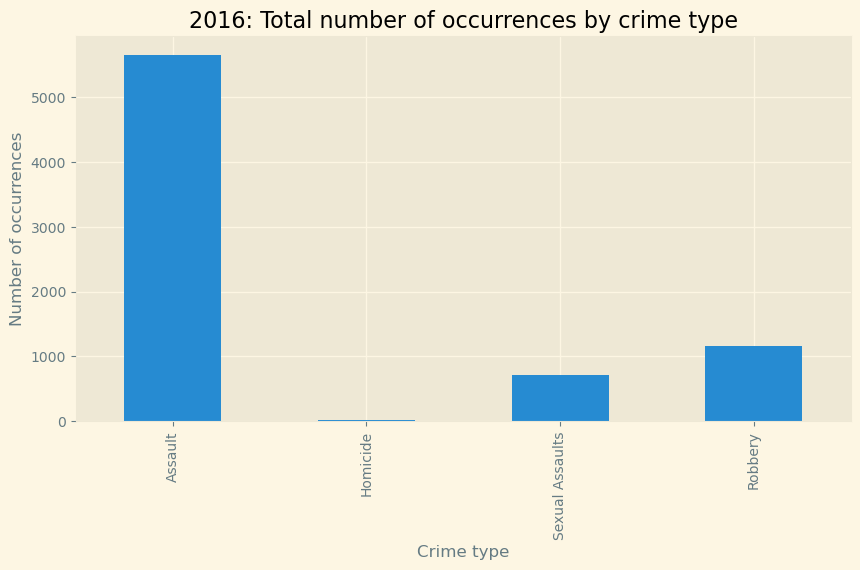

In [112]:
pivot_table[['Assault', 'Homicide', 'Sexual Assaults', 'Robbery']].sum().plot(kind='bar', figsize=(10,5))
plt.title('2016: Total number of occurrences by crime type')
plt.xlabel('Crime type')
plt.ylabel('Number of occurrences')
plt.show()

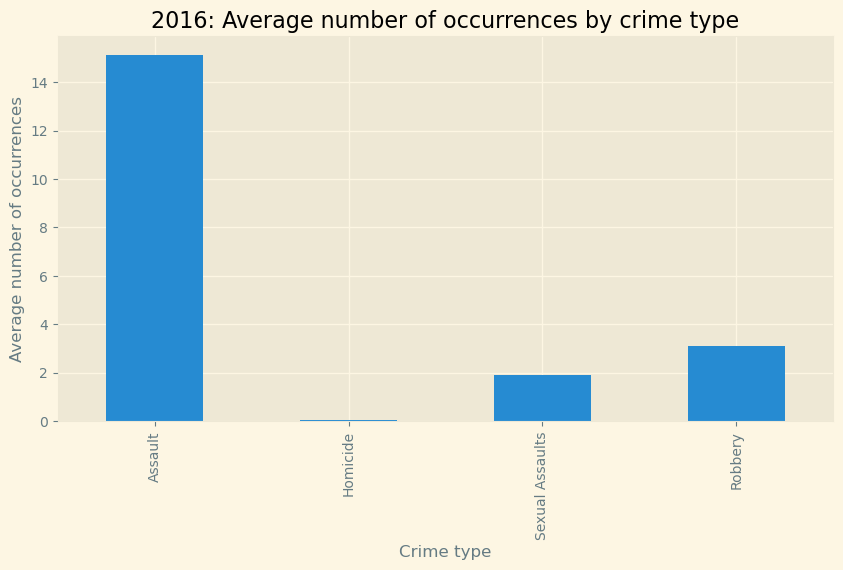

In [113]:
pivot_table[['Assault', 'Homicide', 'Sexual Assaults', 'Robbery']].mean().plot(kind='bar', figsize=(10,5))
plt.title('2016: Average number of occurrences by crime type')
plt.xlabel('Crime type')
plt.ylabel('Average number of occurrences')
plt.show()

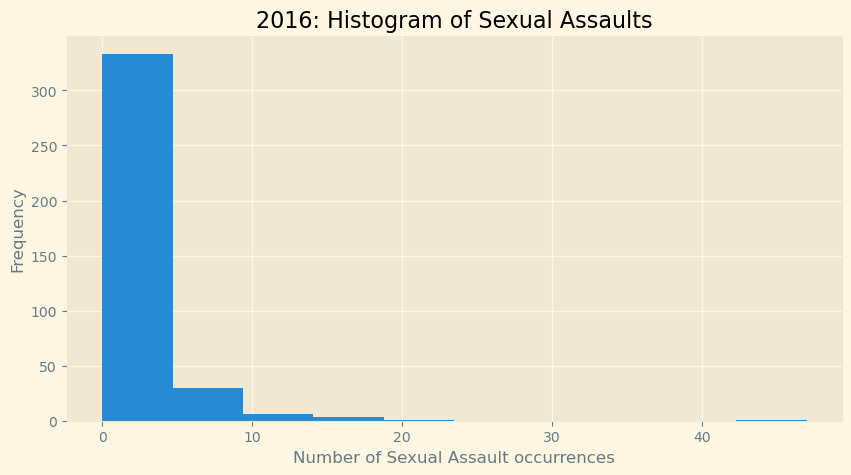

In [114]:
pivot_table['Sexual Assaults'].plot(kind='hist', bins=10, figsize=(10,5))
plt.title('2016: Histogram of Sexual Assaults')
plt.xlabel('Number of Sexual Assault occurrences')
plt.ylabel('Frequency')
plt.show()

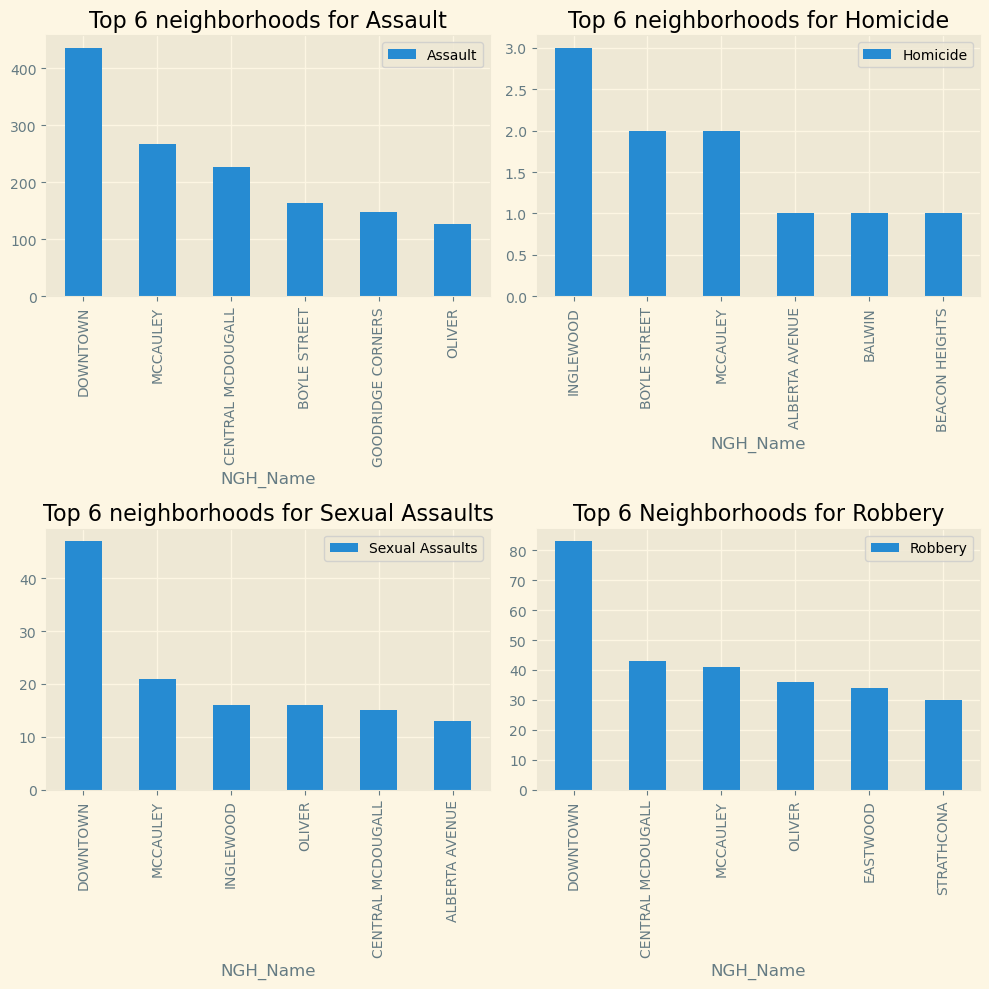

In [115]:
# Select the top 6 neighborhoods with the highest counts of each type of crime
assault_top6 = pivot_table.nlargest(6, 'Assault')
homicide_top6 = pivot_table.nlargest(6, 'Homicide')
sexual_assaults_top6 = pivot_table.nlargest(6, 'Sexual Assaults')
robbery_top6 = pivot_table.nlargest(6, 'Robbery')

# Create a bar plot of the total number of occurrences for each type of crime
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
assault_top6[['Assault']].plot(kind='bar', ax=axs[0, 0], title='Top 6 neighborhoods for Assault')
homicide_top6[['Homicide']].plot(kind='bar', ax=axs[0, 1], title='Top 6 neighborhoods for Homicide')
sexual_assaults_top6[['Sexual Assaults']].plot(kind='bar', ax=axs[1, 0], title='Top 6 neighborhoods for Sexual Assaults')
robbery_top6[['Robbery']].plot(kind='bar', ax=axs[1, 1], title='Top 6 Neighborhoods for Robbery')

plt.tight_layout()
plt.show()

In [116]:
pivot_table = pivot_table.reset_index()

In [117]:
pivot_table

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Employment_No Response,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ALBANY,8,8,0,2,2,9,2,1,53.632382,...,445.0,10.0,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0
2,ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,...,2342.0,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0
3,ALBERTA PARK INDUSTRIAL,1,3,0,0,0,10,6,4,53.566735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALDERGROVE,17,19,0,6,4,46,23,0,53.516888,...,1110.0,119.0,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,WOODCROFT,30,22,0,13,4,40,20,4,53.564595,...,523.0,214.0,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0
370,YELLOWHEAD CORRIDOR EAST,7,15,0,2,0,18,18,2,53.579205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,YELLOWHEAD CORRIDOR WEST,3,0,0,0,0,1,3,0,53.582841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372,YORK,24,21,0,4,2,48,17,4,53.602843,...,843.0,148.0,297.0,271.0,103.0,65.0,42.0,14.0,5.0,510.0


In [118]:
pivot_table.to_csv('March20_2023.csv')

In [119]:
df2=pd.read_csv('March20_2023.csv', encoding_errors='ignore')
df2.drop(['Unnamed: 0'], axis=1, inplace =True)
df2

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Employment_No Response,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ALBANY,8,8,0,2,2,9,2,1,53.632382,...,445.0,10.0,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0
2,ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,...,2342.0,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0
3,ALBERTA PARK INDUSTRIAL,1,3,0,0,0,10,6,4,53.566735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALDERGROVE,17,19,0,6,4,46,23,0,53.516888,...,1110.0,119.0,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,WOODCROFT,30,22,0,13,4,40,20,4,53.564595,...,523.0,214.0,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0
370,YELLOWHEAD CORRIDOR EAST,7,15,0,2,0,18,18,2,53.579205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,YELLOWHEAD CORRIDOR WEST,3,0,0,0,0,1,3,0,53.582841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372,YORK,24,21,0,4,2,48,17,4,53.602843,...,843.0,148.0,297.0,271.0,103.0,65.0,42.0,14.0,5.0,510.0


In [120]:
df2.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response'],
      dtype='object')

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NGH_Name                       374 non-null    object 
 1   Assault                        374 non-null    int64  
 2   Break and Enter                374 non-null    int64  
 3   Homicide                       374 non-null    int64  
 4   Robbery                        374 non-null    int64  
 5   Sexual Assaults                374 non-null    int64  
 6   Theft From Vehicle             374 non-null    int64  
 7   Theft Of Vehicle               374 non-null    int64  
 8   Theft Over $5000               374 non-null    int64  
 9   Latitude                       374 non-null    float64
 10  Longitude                      374 non-null    float64
 11  Preschool                      374 non-null    float64
 12  Kindergarten                   374 non-null    flo

In [122]:
df2['Assault'].mode()[0]

0

The normalize parameter in the value_counts() function specifies whether to normalize the counts to frequencies or not. When normalize=True, the counts are normalized to represent the proportion or frequency of each unique value in the column, rather than the raw count.

In the context of exploring relationships between variables, normalizing the count data can be helpful in comparing the relative importance of each variable. For example, if we have two variables A and B, where the counts for A are much higher than the counts for B, then the raw count data might mask any relationship between A and B. By normalizing the counts, we can see the proportion of occurrences for each unique value in A and B, which can reveal patterns and relationships that might be hidden in the raw count data.

In the case of the Assault column, normalizing the counts can help us see the proportion or frequency of each unique value in the column, which can reveal any patterns or outliers in the data.

In [123]:
df2['Assault'].value_counts(normalize=True)

0      0.152406
1      0.109626
2      0.098930
4      0.056150
3      0.056150
7      0.042781
12     0.037433
8      0.034759
13     0.034759
5      0.029412
15     0.026738
10     0.026738
16     0.024064
14     0.018717
6      0.016043
11     0.013369
24     0.010695
30     0.010695
9      0.010695
20     0.010695
25     0.010695
33     0.008021
41     0.008021
43     0.008021
27     0.008021
21     0.008021
22     0.008021
35     0.008021
26     0.008021
48     0.005348
47     0.005348
18     0.005348
17     0.005348
19     0.005348
70     0.005348
38     0.005348
40     0.005348
46     0.002674
163    0.002674
97     0.002674
71     0.002674
56     0.002674
84     0.002674
59     0.002674
123    0.002674
127    0.002674
23     0.002674
45     0.002674
268    0.002674
36     0.002674
80     0.002674
42     0.002674
226    0.002674
148    0.002674
50     0.002674
37     0.002674
436    0.002674
112    0.002674
49     0.002674
61     0.002674
Name: Assault, dtype: float64

Correlation

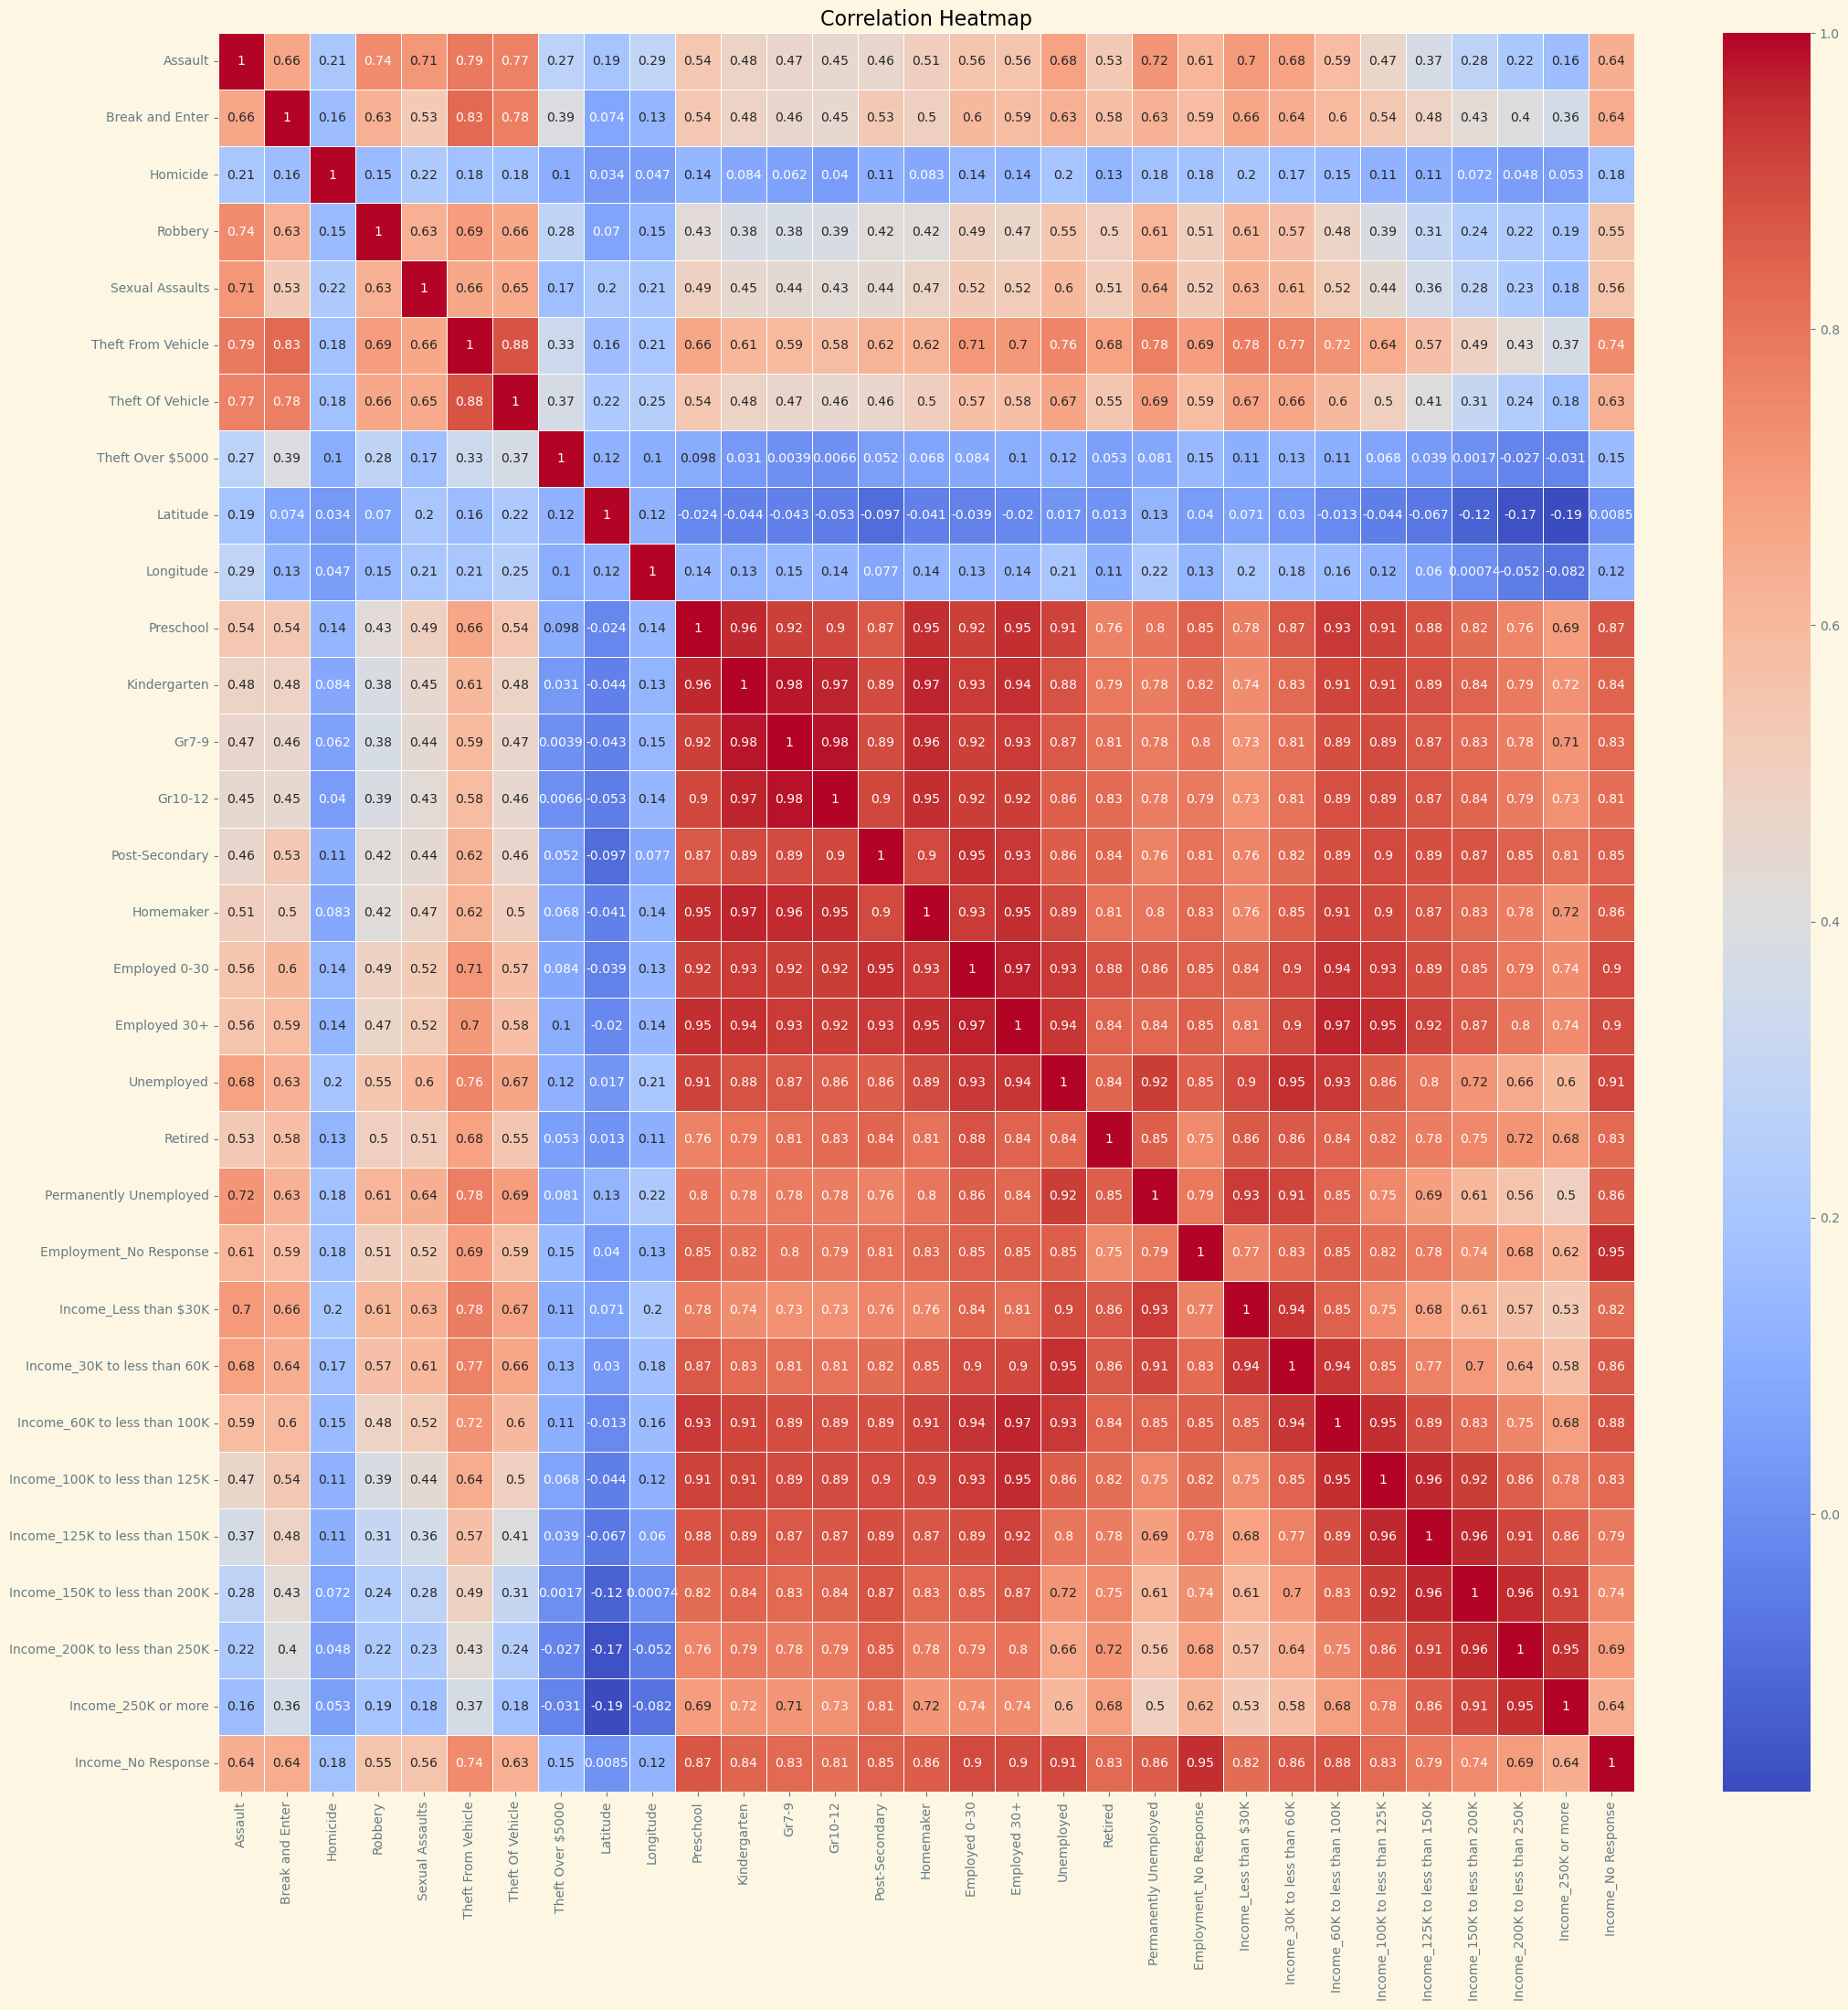

In [124]:
# Create a correlation matrix
corr_matrix = df2.corr(method='spearman')

# Create a heatmap using seaborn
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [171]:
"""This function uses the pandas corr() method to calculate the correlations between the target column and all other columns in the dataframe. 
    It then drops the target column from the list of correlations and gets the top 3 correlations (positive or negative) using the nlargest() method. 
    Finally, it prints the names of the top 3 correlated columns and their correlation sign (positive or negative) along with the correlation value."""

def get_top_correlations(data, target_column):
    # Calculate the correlations between the target column and all other columns
    correlations = data.corr(method='spearman')[target_column].sort_values(ascending=False)
    
    # Drop the target column from the list of correlations
    correlations = correlations.drop(target_column)
    
    # Get the top 3 correlations (positive or negative)
    top_correlations = correlations.abs().nlargest(3)
    
    # Print the top 3 correlations and their sign
    for column, correlation in top_correlations.items():
        sign = 'positive' if correlations[column] > 0 else 'negative'
        print(f"{column}: {sign} correlation ({correlation:.2f})")

In [172]:
get_top_correlations(df2, 'Theft Over $5000')

Break and Enter: positive correlation (0.39)
Theft Of Vehicle: positive correlation (0.37)
Theft From Vehicle: positive correlation (0.33)


In [173]:
df2.iloc[:,1:]

,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,Longitude,...,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response,Cluster
0,35,8,0,8,4,16,6,0,53.574143,-113.388758,...,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0,1
1,8,8,0,2,2,9,2,1,53.632382,-113.549464,...,10.0,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0,0
2,123,119,1,26,13,156,99,2,53.568485,-113.485119,...,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0,2
3,1,3,0,0,0,10,6,4,53.566735,-113.596472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,17,19,0,6,4,46,23,0,53.516888,-113.641242,...,119.0,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,30,22,0,13,4,40,20,4,53.564595,-113.558327,...,214.0,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0,1
370,7,15,0,2,0,18,18,2,53.579205,-113.451964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
371,3,0,0,0,0,1,3,0,53.582841,-113.512729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
372,24,21,0,4,2,48,17,4,53.602843,-113.430212,...,148.0,297.0,271.0,103.0,65.0,42.0,14.0,5.0,510.0,1


Cluster Analysis: Using cluster analysis to group neighborhoods based on similar characteristics such as income, education, and crime rates to identify any patterns or trends.

In [174]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2.iloc[:,1:])




c:\Users\azimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


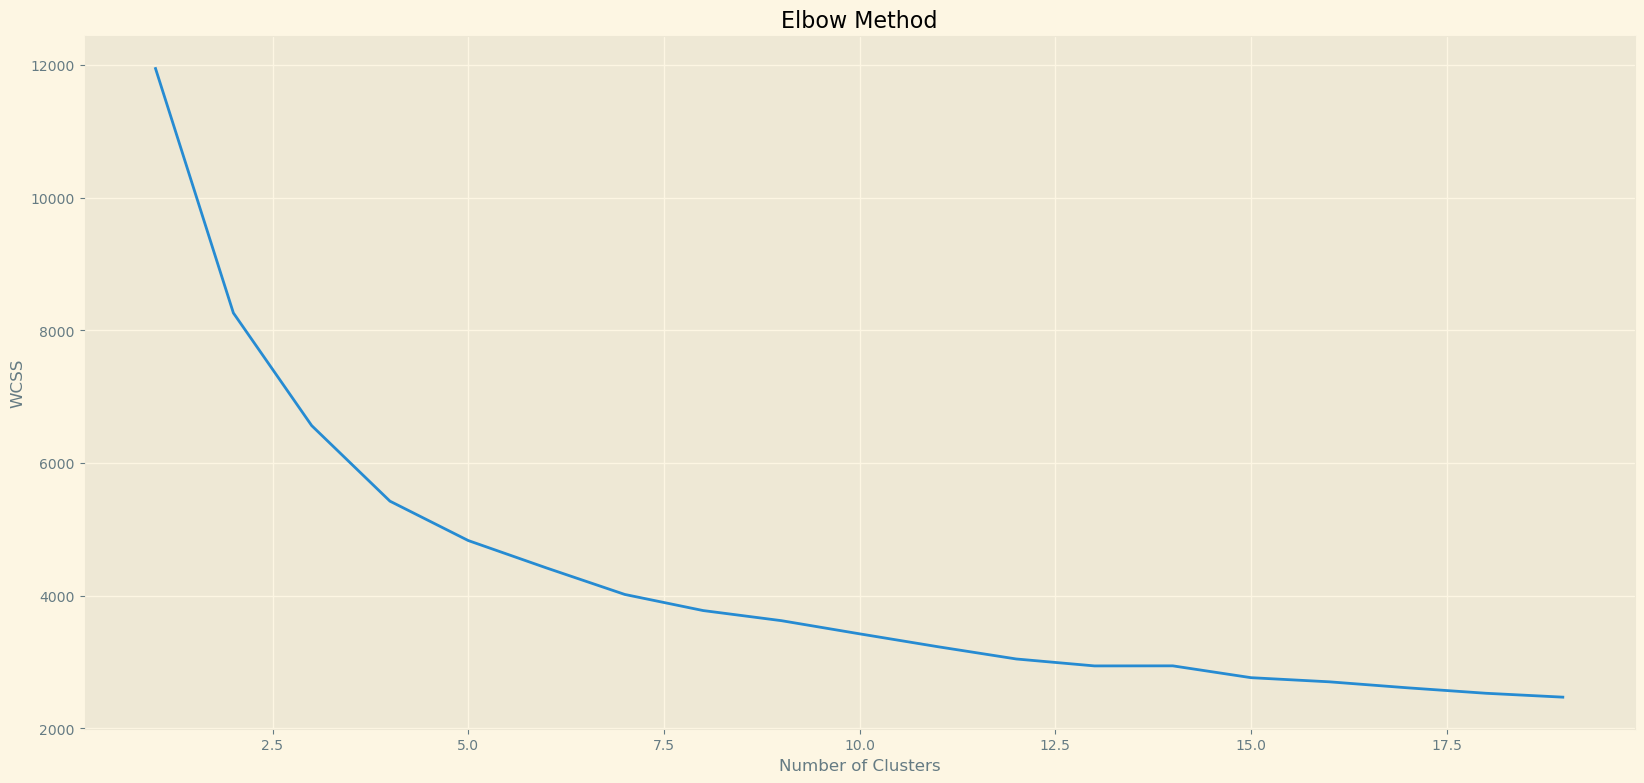

In [175]:
# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



This code first standardizes the data using the StandardScaler function, which scales the features so that they have zero mean and unit variance. It then uses the KMeans algorithm to cluster the data into three clusters based on the standardized data. The Elbow method is used to determine the optimal number of clusters. The code then adds the cluster labels to the original dataframe and plots the clusters using Seaborn. The resulting plot shows the neighborhoods colored by their cluster membership.

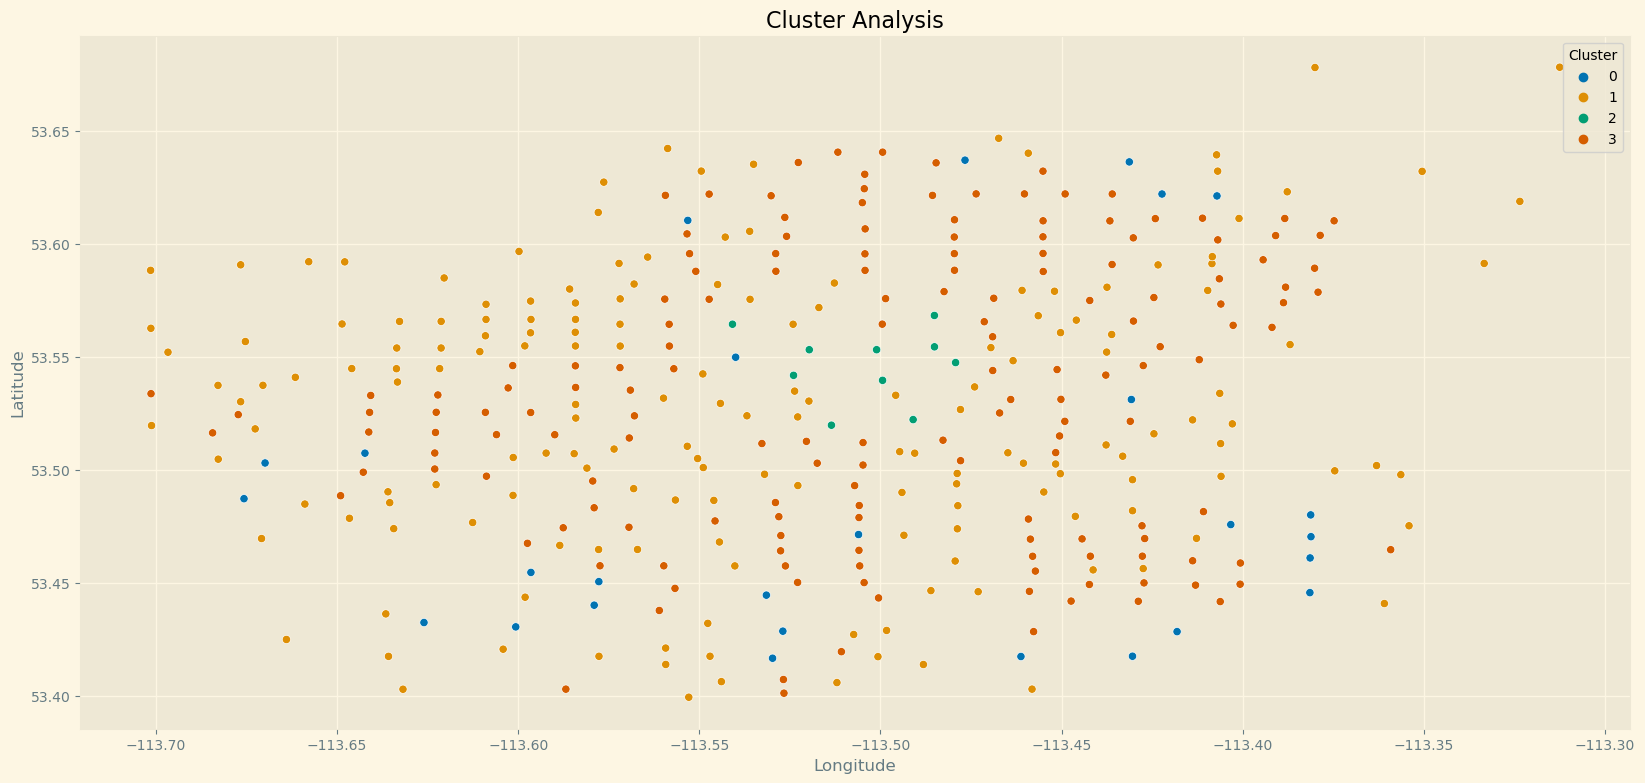

In [176]:
# Create the KMeans model and fit to the standardized data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df2['Cluster'] = pred_y

# Plot the clusters
sns.scatterplot(x='Longitude', y='Latitude', data=df2, hue='Cluster', palette='colorblind')
plt.title('Cluster Analysis')
plt.show()

In [199]:
df2['Cluster'].value_counts()

1    175
3    162
0     27
2     10
Name: Cluster, dtype: int64

In [200]:
cluster_0=df2[df2['Cluster']==0]
cluster_1=df2[df2['Cluster']==1]
cluster_2=df2[df2['Cluster']==2]
cluster_3=df2[df2['Cluster']==3]

In [210]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Using Geopandas
# first need to get out edmonton/neighbourhoods shape file..and change the columns to match our datafile
#https://data.edmonton.ca/Geospatial-Boundaries/2016-Federal-Census-Neighbourhoods-as-of-Official-/3did-mjnj
edmonton_shp=gpd.read_file('geo_export_67517c45-71c1-4f9b-8051-9eaf76457140.shp', geometry='geometry')
edmonton_shp.rename(columns={'name': 'NGH_Name', 'neighbourh': 'NGH_Number'}, inplace=True)
edmonton_shp.drop(['descriptiv', 'date_effec', 'time_effec', 'date_eff_2', 'time_eff_2', 'descriptio'], axis=1, inplace =True)
edmonton_shp.head()

,NGH_Number,NGH_Name,geometry
0,5310.0,PARKALLEN,"POLYGON ((-113.52294 53.50390, -113.52299 53.5..."
1,4400.0,PLACE LARUE,"POLYGON ((-113.63538 53.53748, -113.63986 53.5..."
2,5170.0,EMPIRE PARK,"POLYGON ((-113.49897 53.48824, -113.49765 53.4..."
3,2270.0,EVERGREEN,"POLYGON ((-113.35656 53.62863, -113.35664 53.6..."
4,5520.0,UNIVERSITY OF ALBERTA,"POLYGON ((-113.51500 53.52575, -113.51500 53.5..."


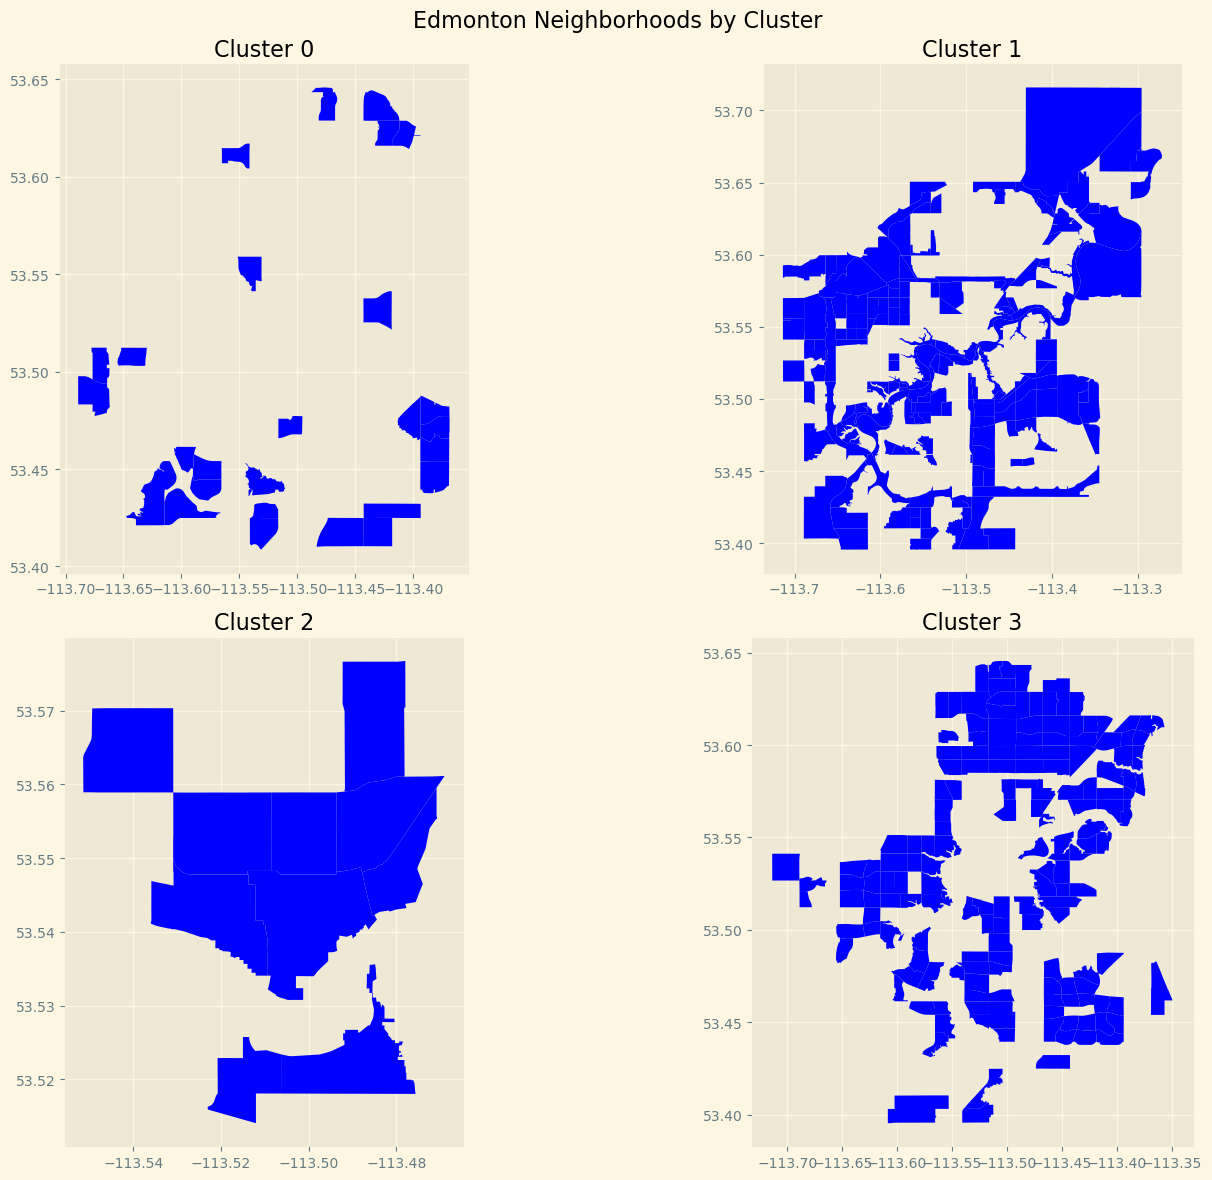

In [213]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Join the cluster labels to the Edmonton neighborhoods dataframe
edmonton_shp = edmonton_shp.merge(df2[['NGH_Name', 'Cluster']], on='NGH_Name', how='left')

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot each cluster in a separate subplot
for i, cluster_label in enumerate(range(4)):
    # Select the neighborhoods in the current cluster and plot them on a map
    edmonton_shp[edmonton_shp['Cluster'] == cluster_label].plot(ax=axs[i//2, i%2], color='blue')
    axs[i//2, i%2].set_title(f'Cluster {cluster_label}')

# Set the overall title for the figure and tighten the layout
fig.suptitle('Edmonton Neighborhoods by Cluster', fontsize=16)
plt.tight_layout()

In [216]:
cluster_0['NGH_Name']

7              AMBLESIDE
48             BRINTNELL
75          CHARLESWORTH
86            CUMBERLAND
99                DUGGAN
130          GLASTONBURY
145               HADDOW
160       HOLLICK-KENYON
182      KINISKI GARDENS
185           KLARVATTEN
190             LARKSPUR
192               LAUREL
199              LYMBURN
201              MACEWAN
213      MCCONACHIE AREA
244             OTTEWELL
303           RUTHERFORD
312         SILVER BERRY
315    SOUTH TERWILLEGAR
328           SUMMERSIDE
335    TERWILLEGAR TOWNE
336         THE HAMPTONS
342          TWIN BROOKS
346               WALKER
356            WESTMOUNT
362            WILD ROSE
364           WINDERMERE
Name: NGH_Name, dtype: object

In [215]:
cluster_1['NGH_Name']

1                               ALBANY
3              ALBERTA PARK INDUSTRIAL
8                       ANTHONY HENDAY
9              ANTHONY HENDAY BIG LAKE
10          ANTHONY HENDAY ENERGY PARK
                    ...               
367    WINTERBURN INDUSTRIAL AREA EAST
368    WINTERBURN INDUSTRIAL AREA WEST
370           YELLOWHEAD CORRIDOR EAST
371           YELLOWHEAD CORRIDOR WEST
373              YOUNGSTOWN INDUSTRIAL
Name: NGH_Name, Length: 175, dtype: object

In [214]:

cluster_2['NGH_Name']

2         ALBERTA AVENUE
45          BOYLE STREET
72     CENTRAL MCDOUGALL
98              DOWNTOWN
127              GARNEAU
167            INGLEWOOD
212             MCCAULEY
242               OLIVER
264      QUEEN MARY PARK
322           STRATHCONA
Name: NGH_Name, dtype: object

The KMeans clustering algorithm groups data points into clusters based on their similarity in terms of the features that are being used for clustering. In your case, the algorithm used the standardized values of the crime rates, education levels, and demographic characteristics to group the neighborhoods into clusters.

Without further analysis, it is difficult to say exactly why the algorithm grouped those neighborhoods together in one cluster. However, one possible explanation is that those neighborhoods share similar values across the features used for clustering. For example, they may have similar crime rates, income levels, and education levels. It's also possible that there are underlying factors that are not captured by the features used for clustering, such as cultural or historical factors, that contribute to the similarity between those neighborhoods.

To gain a deeper understanding of why those neighborhoods were grouped together, you can perform further analysis on the data or consult with experts in the field to provide additional context.

In [179]:
cluster_2

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response,Cluster
2,ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,...,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0,2
45,BOYLE STREET,163,50,2,16,13,128,44,4,53.547631,...,826.0,487.0,303.0,87.0,41.0,32.0,10.0,14.0,2172.0,2
72,CENTRAL MCDOUGALL,226,50,0,43,15,122,70,5,53.553332,...,610.0,435.0,172.0,32.0,17.0,7.0,2.0,4.0,1714.0,2
98,DOWNTOWN,436,123,1,83,47,316,87,10,53.539767,...,972.0,994.0,1093.0,425.0,199.0,198.0,68.0,81.0,4660.0,2
127,GARNEAU,33,78,0,17,2,83,33,1,53.519911,...,1044.0,523.0,423.0,132.0,78.0,89.0,33.0,61.0,3183.0,2
167,INGLEWOOD,80,76,3,23,16,101,47,3,53.564606,...,521.0,536.0,305.0,178.0,188.0,180.0,97.0,98.0,1362.0,2
212,MCCAULEY,268,49,2,41,21,118,49,2,53.554605,...,530.0,214.0,135.0,30.0,14.0,13.0,8.0,0.0,1401.0,2
242,OLIVER,127,118,0,36,16,196,75,5,53.541983,...,1413.0,1611.0,1505.0,537.0,277.0,231.0,91.0,120.0,6716.0,2
264,QUEEN MARY PARK,84,46,0,13,8,138,61,3,53.553321,...,587.0,488.0,294.0,92.0,55.0,43.0,10.0,11.0,2367.0,2
322,STRATHCONA,97,95,0,30,6,124,54,2,53.522390,...,488.0,651.0,664.0,290.0,149.0,147.0,76.0,92.0,2748.0,2


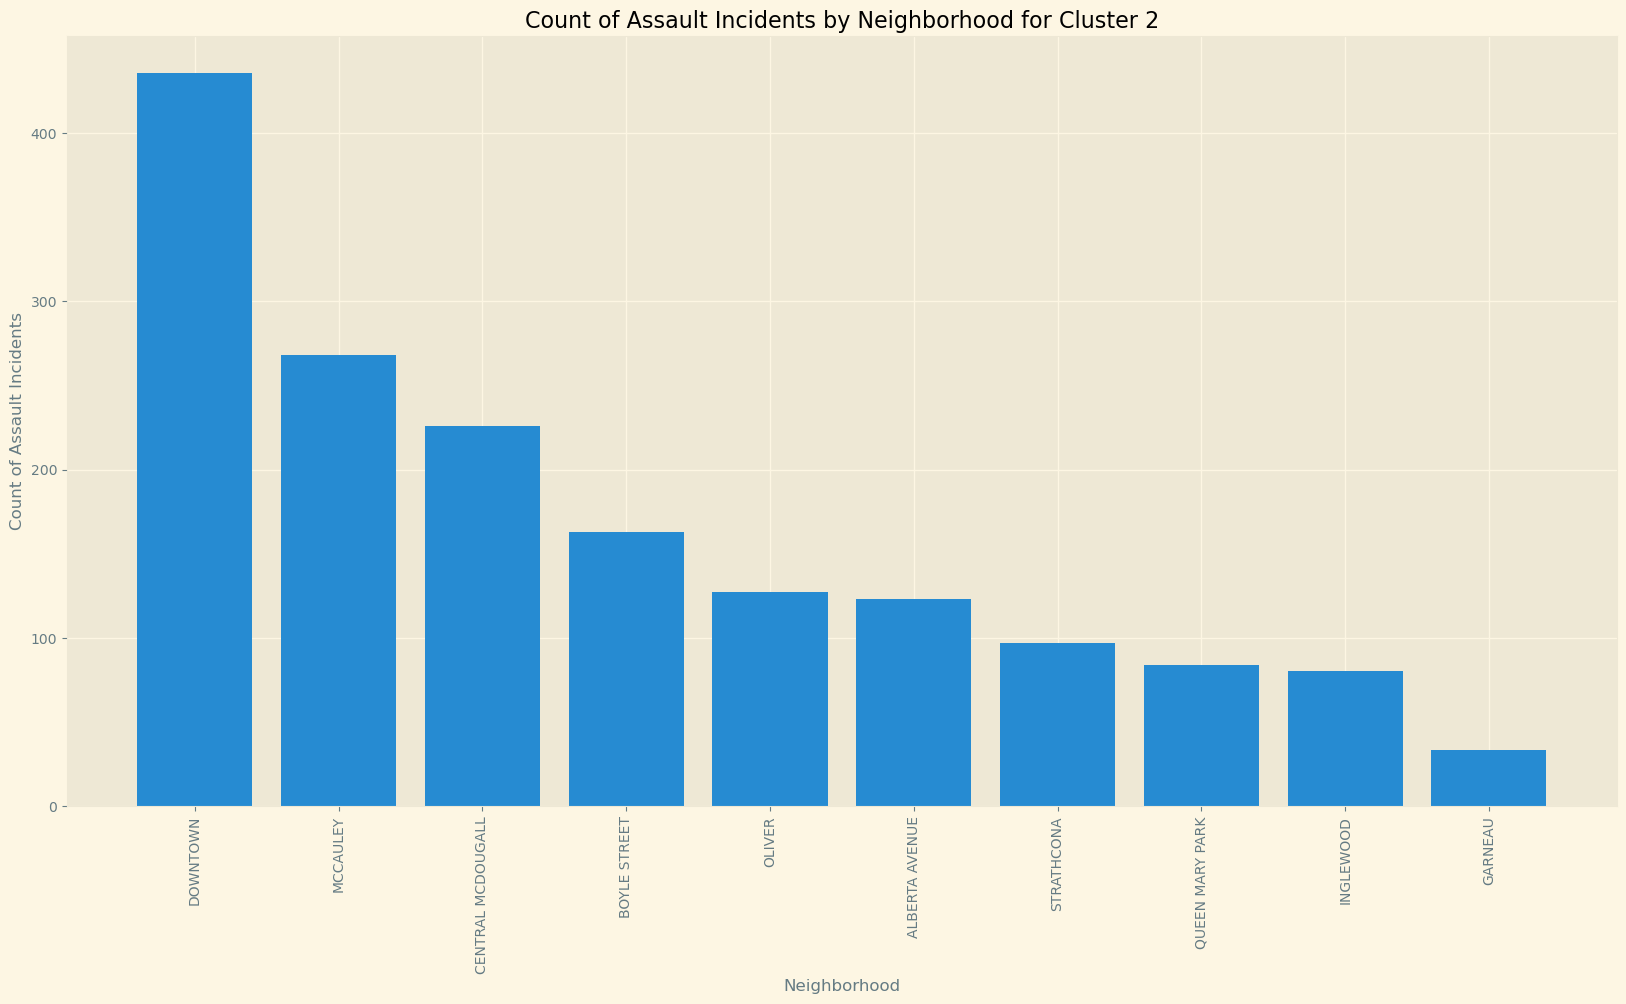

In [180]:
# Select the 'NGH_Name' and 'Assault' columns from the dataframe
assault_data = cluster_2[['NGH_Name', 'Assault']]

# Sort the data by the count of Assaults in descending order
sorted_data = assault_data.sort_values(by='Assault', ascending=False)

# Create a bar plot of the count of Assaults for each neighborhood
plt.figure(figsize=(20, 10))
plt.bar(sorted_data['NGH_Name'], sorted_data['Assault'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Count of Assault Incidents')
plt.title('Count of Assault Incidents by Neighborhood for Cluster 2')
plt.show()


Crime rates: You can look at the types and frequency of crimes that are occurring in each neighborhood in cluster 2. Are certain types of crimes more prevalent in some neighborhoods than others? Are there any patterns or trends in the crime data that are unique to this cluster?

In [181]:
# Create a new dataframe for cluster 2
cluster_2_df = df2[df2['Cluster'] == 2]

# Group the data by neighborhood and calculate the total number of crimes for each type of crime
crime_totals = cluster_2_df.groupby('NGH_Name')[['Assault', 'Break and Enter', 'Homicide', 'Robbery', 'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].sum()

# Print the resulting dataframe
crime_totals

,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000
NGH_Name,,,,,,,,
ALBERTA AVENUE,123,119,1,26,13,156,99,2
BOYLE STREET,163,50,2,16,13,128,44,4
CENTRAL MCDOUGALL,226,50,0,43,15,122,70,5
DOWNTOWN,436,123,1,83,47,316,87,10
GARNEAU,33,78,0,17,2,83,33,1
INGLEWOOD,80,76,3,23,16,101,47,3
MCCAULEY,268,49,2,41,21,118,49,2
OLIVER,127,118,0,36,16,196,75,5
QUEEN MARY PARK,84,46,0,13,8,138,61,3


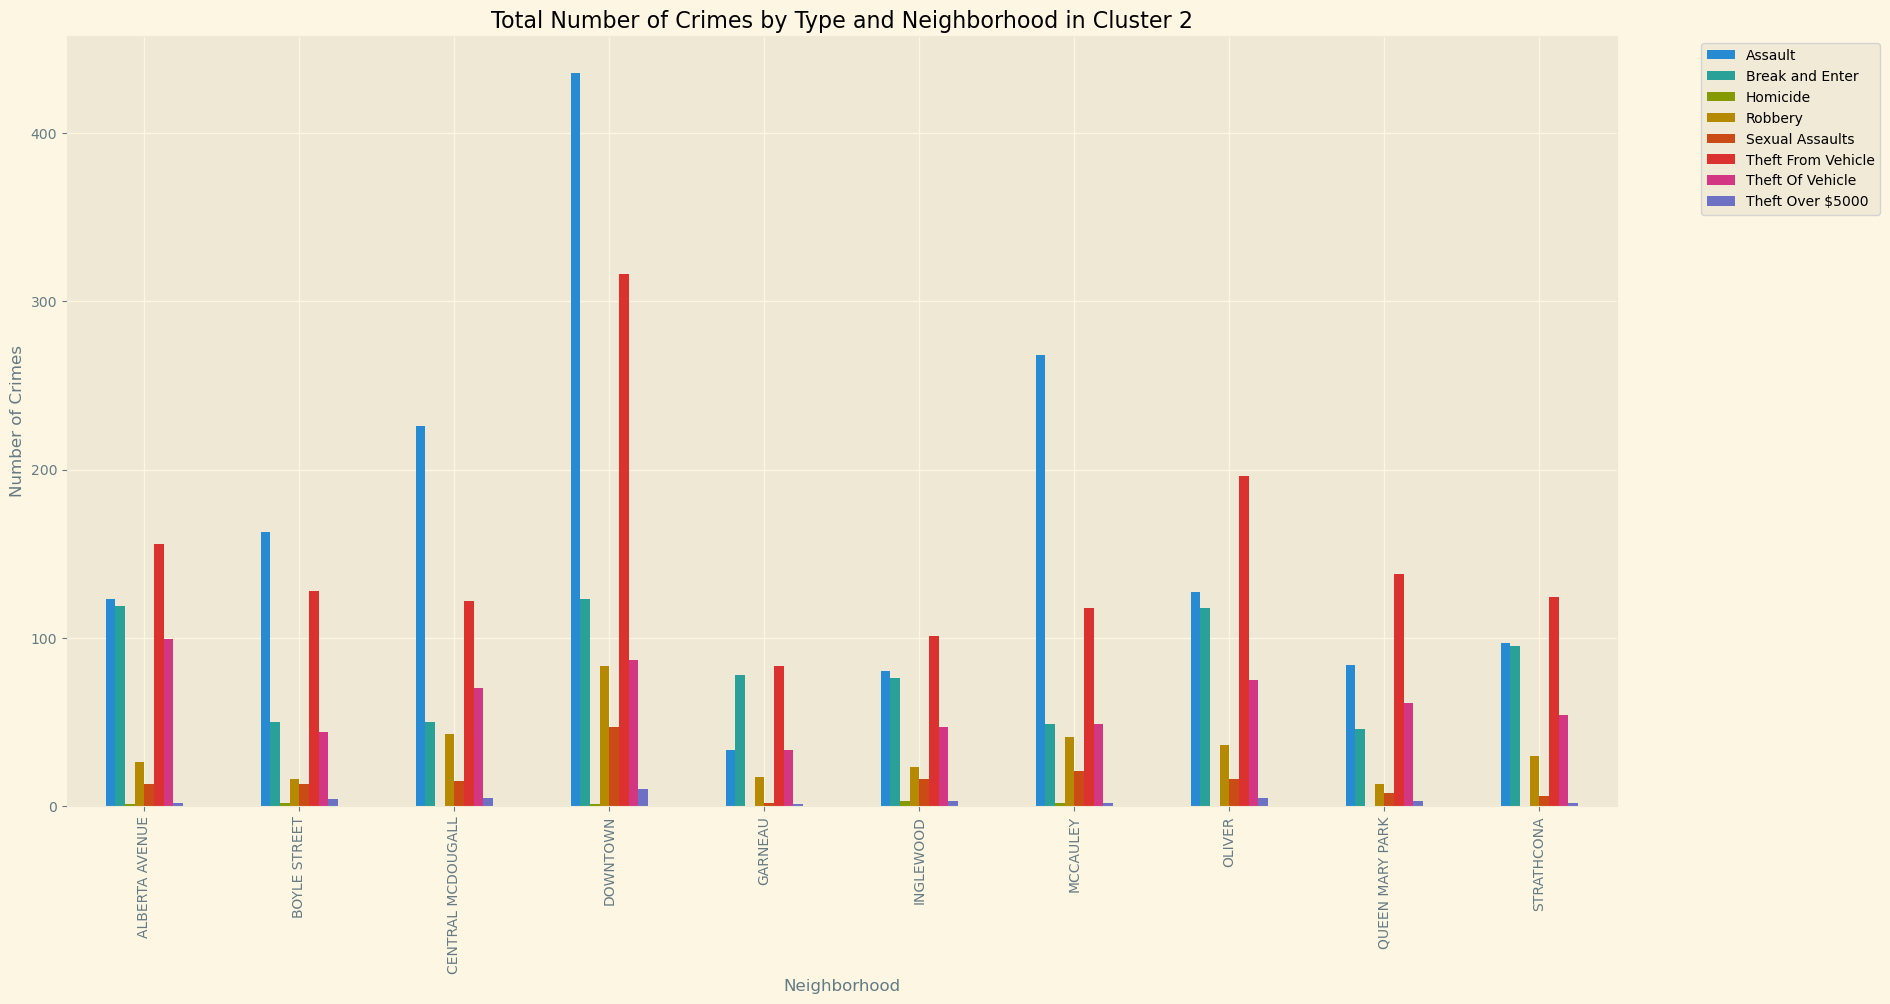

In [144]:
""""This code will create a bar chart that shows the total number of crimes for each type of crime in each neighborhood within cluster 2. 
    The x-axis shows the neighborhoods, and the y-axis shows the total number of crimes. 
    Each color in the bar chart represents a different type of crime. 
    You can use this visualization to see which neighborhoods have the highest crime rates and ..
    which types of crimes are most prevalent in each neighborhood."""

# Create a new dataframe for cluster 2
cluster_2_df = df2[df2['Cluster'] == 2]

# Group the data by neighborhood and calculate the total number of crimes for each type of crime
crime_totals = cluster_2_df.groupby('NGH_Name')[['Assault', 'Break and Enter', 'Homicide', 'Robbery', 'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].sum()

# Create a bar chart showing the total number of crimes for each type of crime in each neighborhood
crime_totals.plot(kind='bar', figsize=(20,10))
plt.title('Total Number of Crimes by Type and Neighborhood in Cluster 2')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(np.arange(len(crime_totals.index)), crime_totals.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [150]:
# Create a new dataframe for cluster 2
cluster_2_df = df2[df2['Cluster'] == 2]

# Group the data by neighborhood and calculate the total count of people in each income category
income_counts = cluster_2_df.groupby('NGH_Name')[['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K', 'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K', 'Income_200K to less than 250K', 'Income_250K or more']].mean()

# Print the resulting dataframe
income_counts

,Income_Less than $30K,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more
NGH_Name,,,,,,,,
ALBERTA AVENUE,601.0,667.0,364.0,139.0,62.0,61.0,11.0,4.0
BOYLE STREET,826.0,487.0,303.0,87.0,41.0,32.0,10.0,14.0
CENTRAL MCDOUGALL,610.0,435.0,172.0,32.0,17.0,7.0,2.0,4.0
DOWNTOWN,972.0,994.0,1093.0,425.0,199.0,198.0,68.0,81.0
GARNEAU,1044.0,523.0,423.0,132.0,78.0,89.0,33.0,61.0
INGLEWOOD,521.0,536.0,305.0,178.0,188.0,180.0,97.0,98.0
MCCAULEY,530.0,214.0,135.0,30.0,14.0,13.0,8.0,0.0
OLIVER,1413.0,1611.0,1505.0,537.0,277.0,231.0,91.0,120.0
QUEEN MARY PARK,587.0,488.0,294.0,92.0,55.0,43.0,10.0,11.0


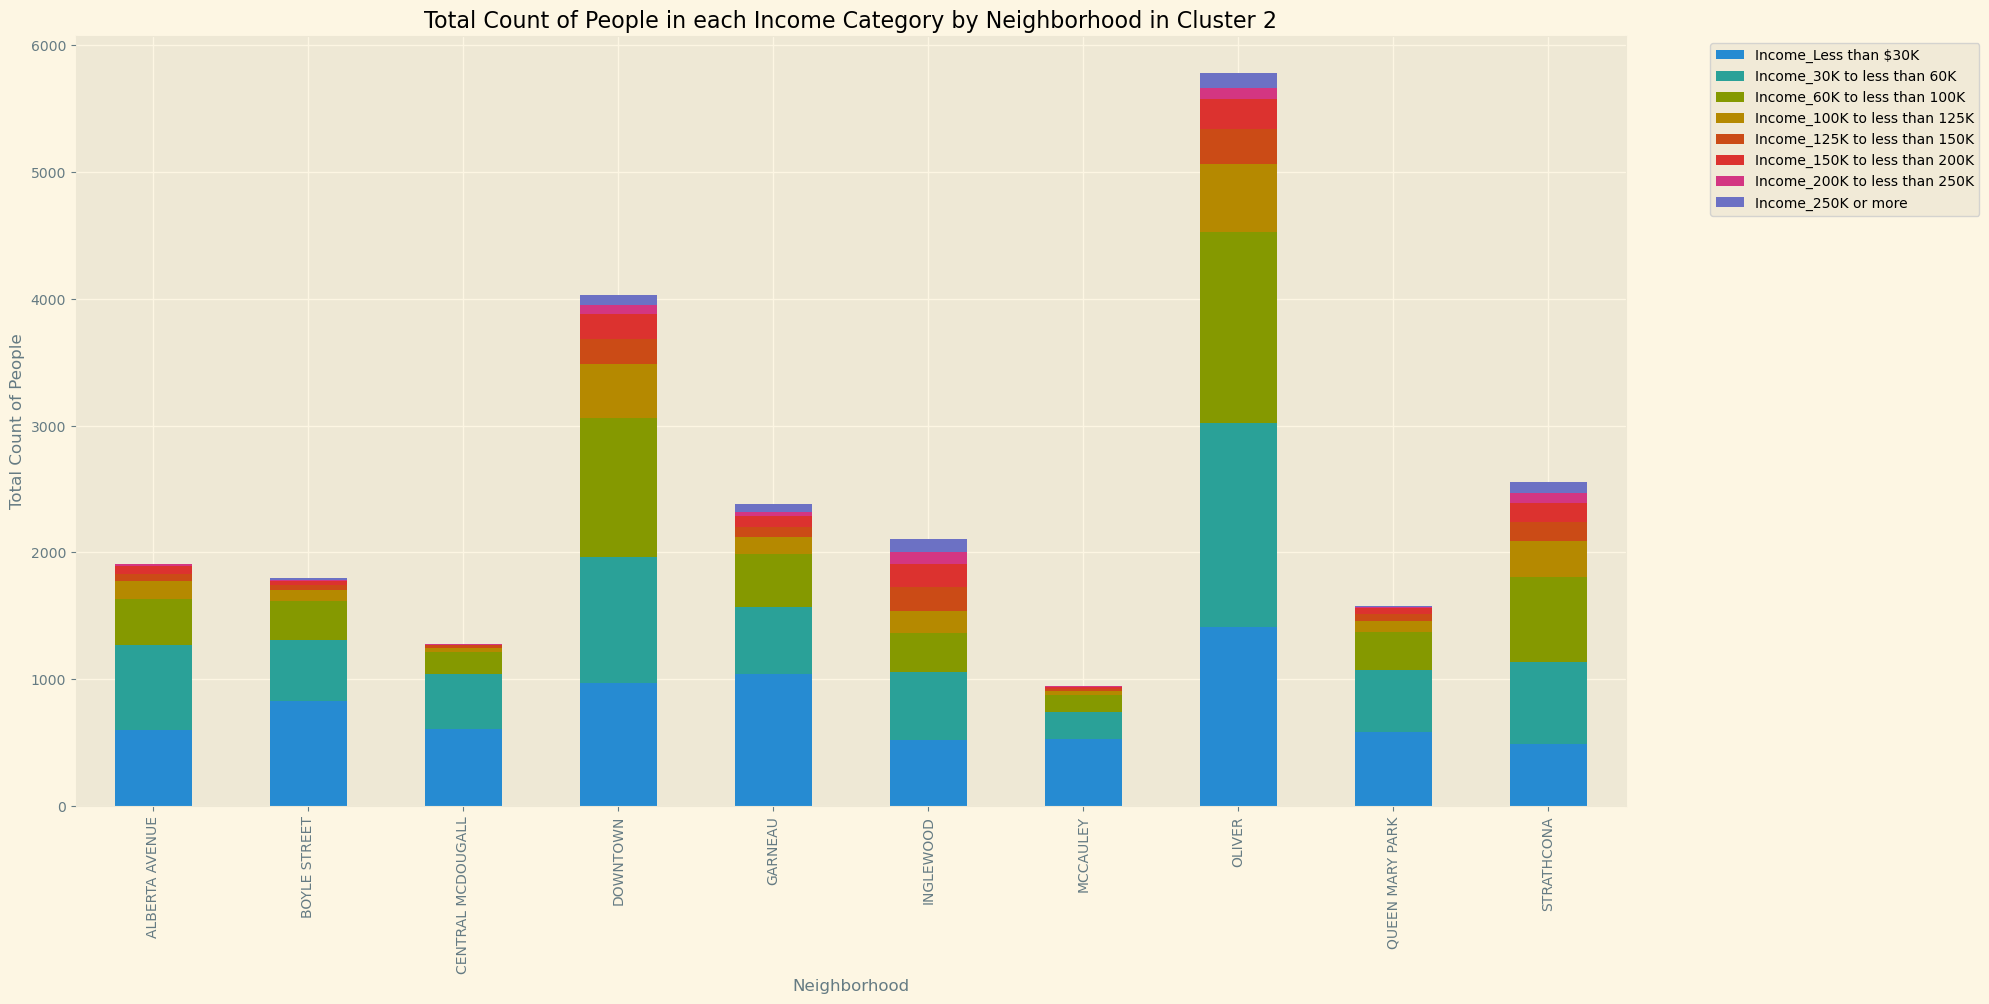

In [151]:
# Create a new dataframe for cluster 2
cluster_2_df = df2[df2['Cluster'] == 2]

# Group the data by neighborhood and calculate the total count of people in each income category
income_counts = cluster_2_df.groupby('NGH_Name')[['Income_Less than $30K', 'Income_30K to less than 60K', 'Income_60K to less than 100K', 'Income_100K to less than 125K', 'Income_125K to less than 150K', 'Income_150K to less than 200K', 'Income_200K to less than 250K', 'Income_250K or more']].mean()

# Create a stacked bar chart showing the total count of people in each income category for each neighborhood
income_counts.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('Total Count of People in each Income Category by Neighborhood in Cluster 2')
plt.xlabel('Neighborhood')
plt.ylabel('Total Count of People')
plt.xticks(np.arange(len(income_counts.index)), income_counts.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

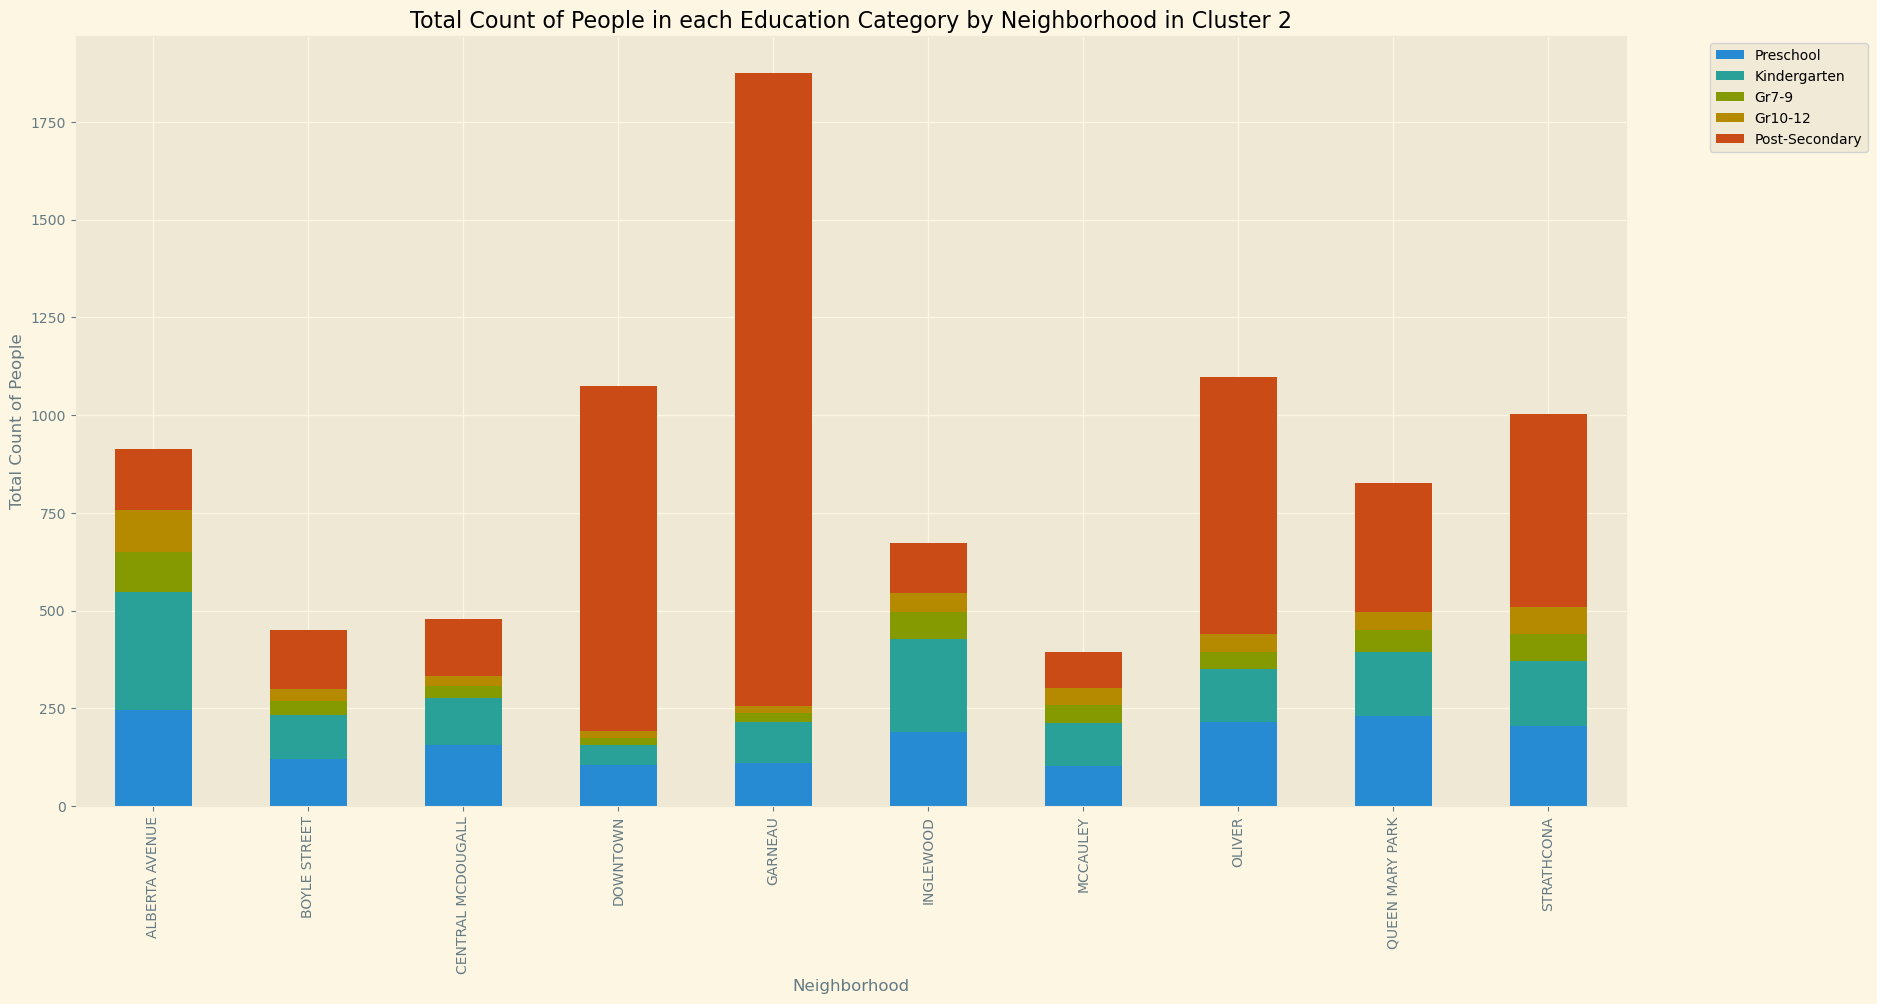

In [149]:
# Create a new dataframe for cluster 2
cluster_2_df = df2[df2['Cluster'] == 2]

# Group the data by neighborhood and calculate the total count of people in each Education category
education_counts = cluster_2_df.groupby('NGH_Name')[['Preschool', 'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary']].sum()

# Create a stacked bar chart showing the total count of people in each Education category for each neighborhood
education_counts.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('Total Count of People in each Education Category by Neighborhood in Cluster 2')
plt.xlabel('Neighborhood')
plt.ylabel('Total Count of People')
plt.xticks(np.arange(len(education_counts.index)), education_counts.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [154]:
cluster_2.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response', 'Cluster'],
      dtype='object')

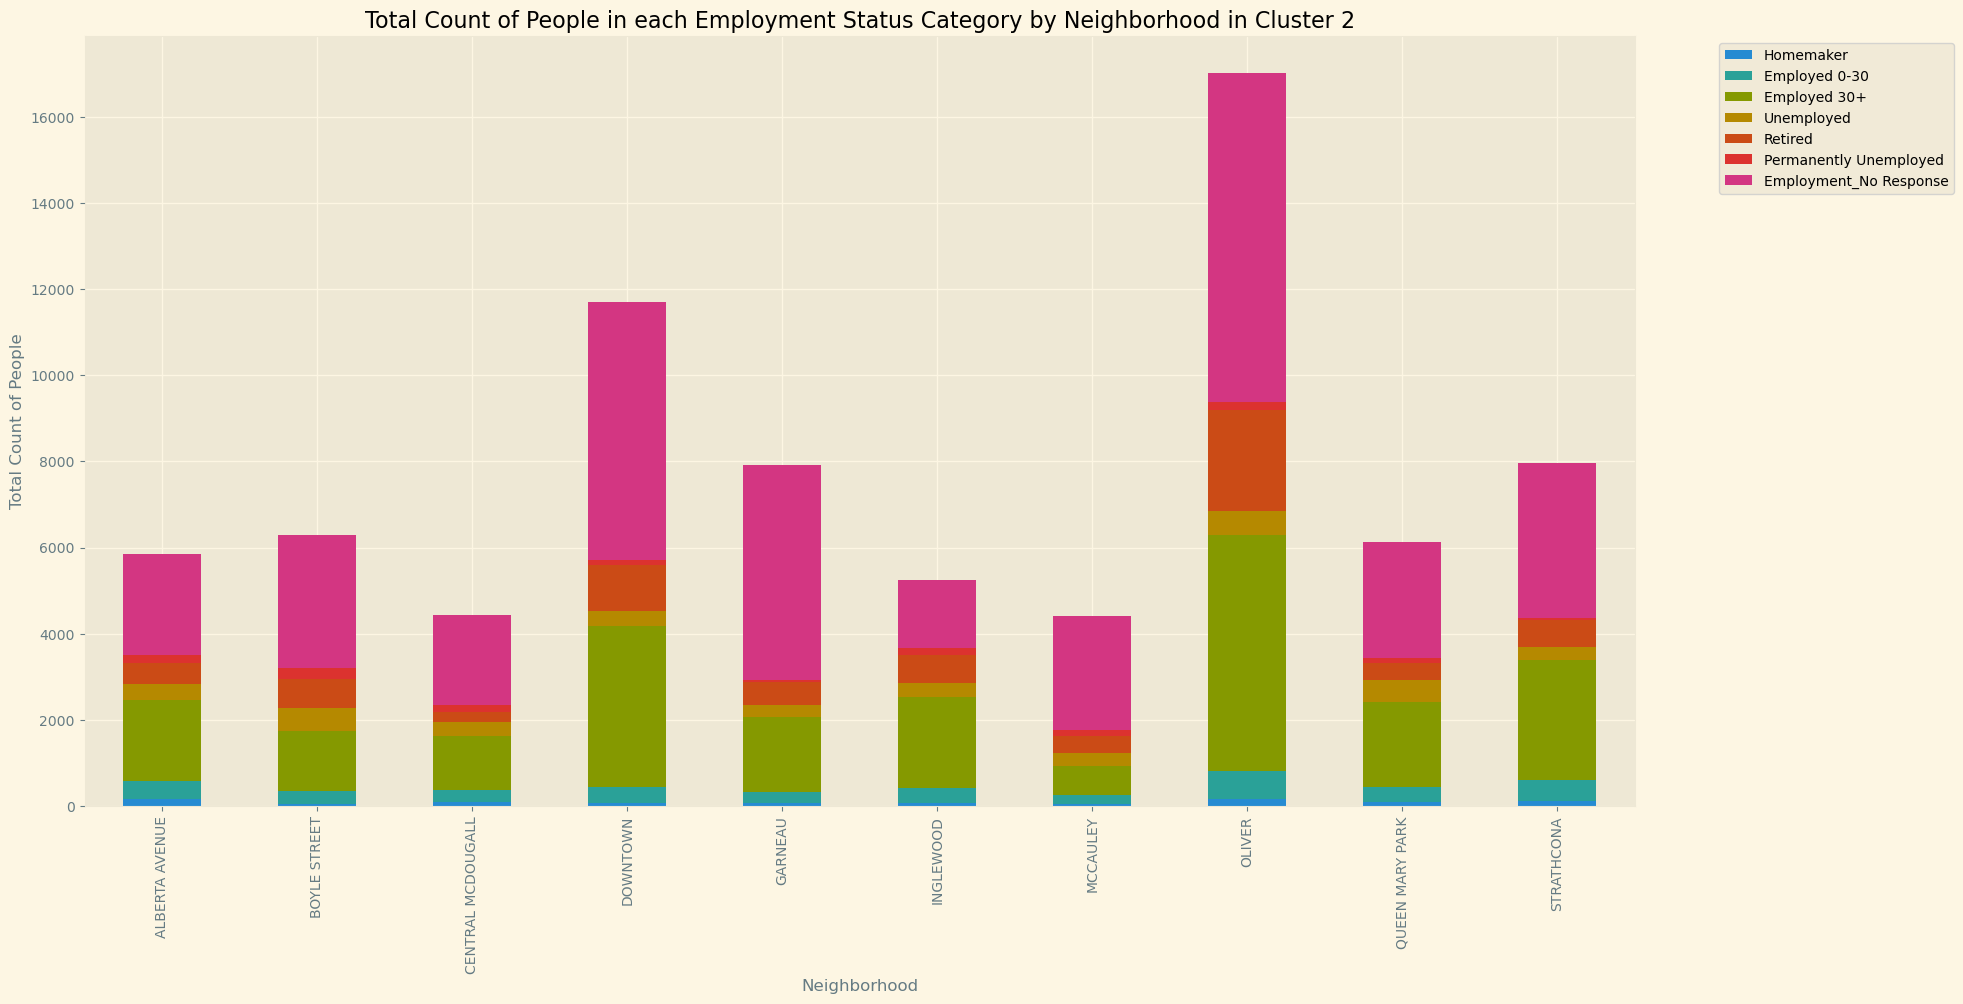

In [155]:
# Create a new dataframe for cluster 2
cluster_2_df = df2[df2['Cluster'] == 2]

# Group the data by neighborhood and calculate the total count of people in each Education category
education_counts = cluster_2_df.groupby('NGH_Name')[['Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response']].sum()

# Create a stacked bar chart showing the total count of people in each Education category for each neighborhood
education_counts.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('Total Count of People in each Employment Status Category by Neighborhood in Cluster 2')
plt.xlabel('Neighborhood')
plt.ylabel('Total Count of People')
plt.xticks(np.arange(len(education_counts.index)), education_counts.index, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Cluster 0

Cluster 1

Cluster 3

In [217]:
# Group the data by neighborhood and calculate the total number of crimes for each type of crime
crime_totals_3 = cluster_3.groupby('NGH_Name')[['Assault', 'Break and Enter', 'Homicide', 'Robbery', 'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle', 'Theft Over $5000']].sum()

# Print the resulting dataframe
crime_totals_3

,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000
NGH_Name,,,,,,,,
ABBOTTSFIELD,35,8,0,8,4,16,6,0
ALDERGROVE,17,19,0,6,4,46,23,0
ALLARD,6,17,0,1,0,12,3,4
ALLENDALE,10,28,0,6,0,51,17,1
ASPEN GARDENS,1,2,0,0,0,12,2,0
...,...,...,...,...,...,...,...,...
WEST JASPER PLACE,47,29,0,10,5,41,31,4
WEST MEADOWLARK PARK,33,17,0,4,3,37,25,1
WESTWOOD,43,34,0,7,6,53,48,1


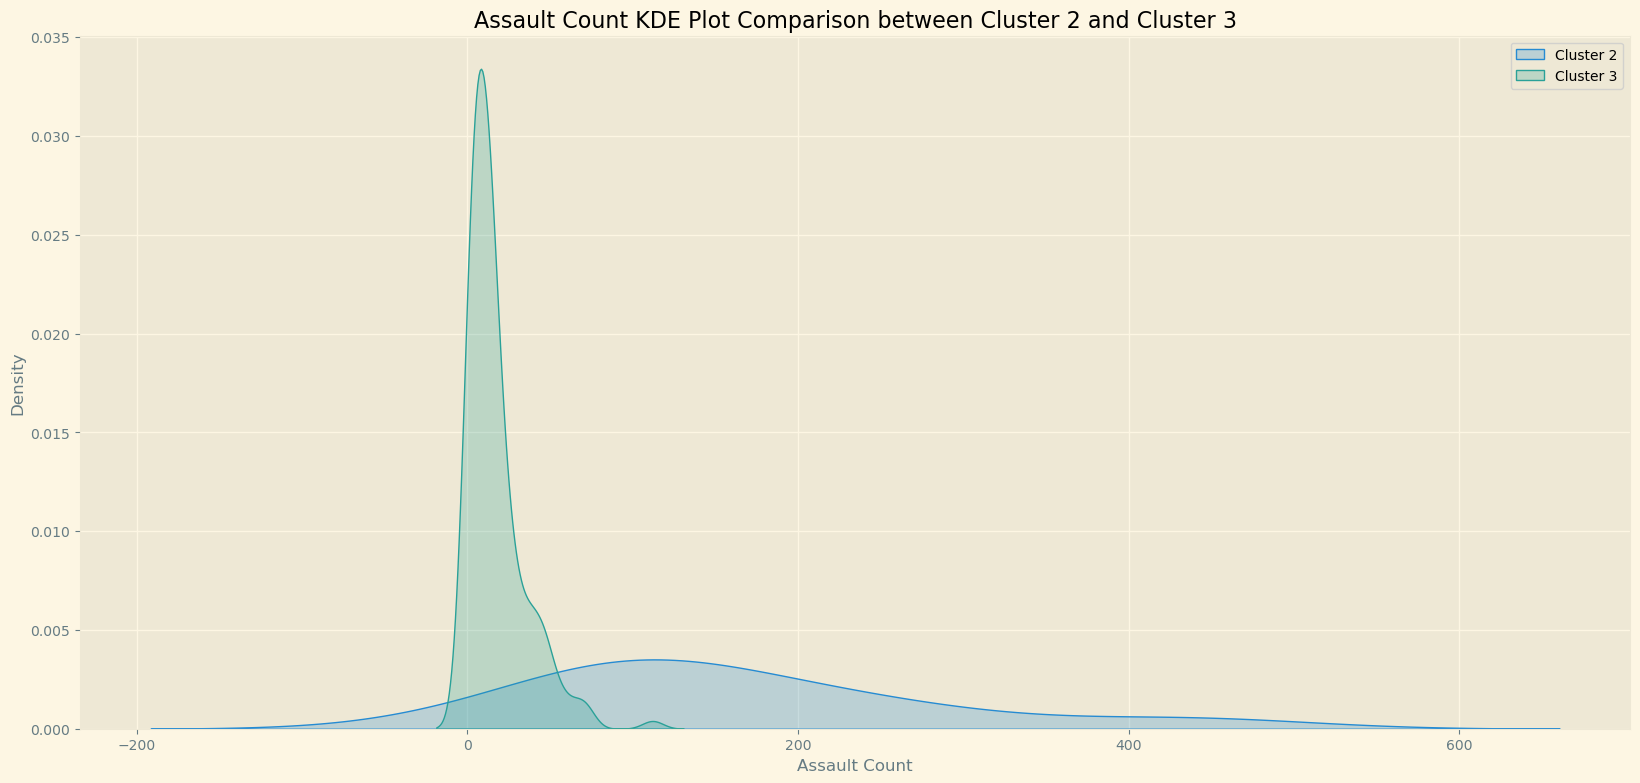

In [218]:
# Create new dataframes for cluster 2 and cluster 3
cluster_2_df = df2[df2['Cluster'] == 2]
cluster_3_df = df2[df2['Cluster'] == 3]

# Plot KDE plots for 'Assault' in cluster 2 and cluster 3
sns.kdeplot(cluster_2_df['Assault'], fill=True, label='Cluster 2')
sns.kdeplot(cluster_3_df['Assault'], fill=True, label='Cluster 3')
plt.xlabel('Assault Count')
plt.ylabel('Density')
plt.title('Assault Count KDE Plot Comparison between Cluster 2 and Cluster 3')
plt.legend()
plt.show()

A flat KDE plot indicates a relatively uniform distribution of data, while a peaked KDE plot indicates a more concentrated distribution. In this case, the fact that the KDE plot for 'Assault' in cluster_2 is relatively flat suggests that the counts of Assault incidents in this cluster are more evenly distributed across the different neighborhoods, without any one neighborhood having a significantly higher or lower count than the others.

On the other hand, the peaked KDE plot for 'Assault' in cluster_3 suggests that the counts of Assault incidents in this cluster are more concentrated around a certain range, with some neighborhoods having much higher counts than others. This can be an indication of certain neighborhoods in cluster_3 being more prone to higher levels of crime than others.

Overall, the KDE plots can provide insights into the distribution of data and can help you to compare the patterns between different clusters. However, it's important to note that KDE plots are not a definitive way to analyze the data, and you should always consider multiple sources of information when drawing conclusions about your data.

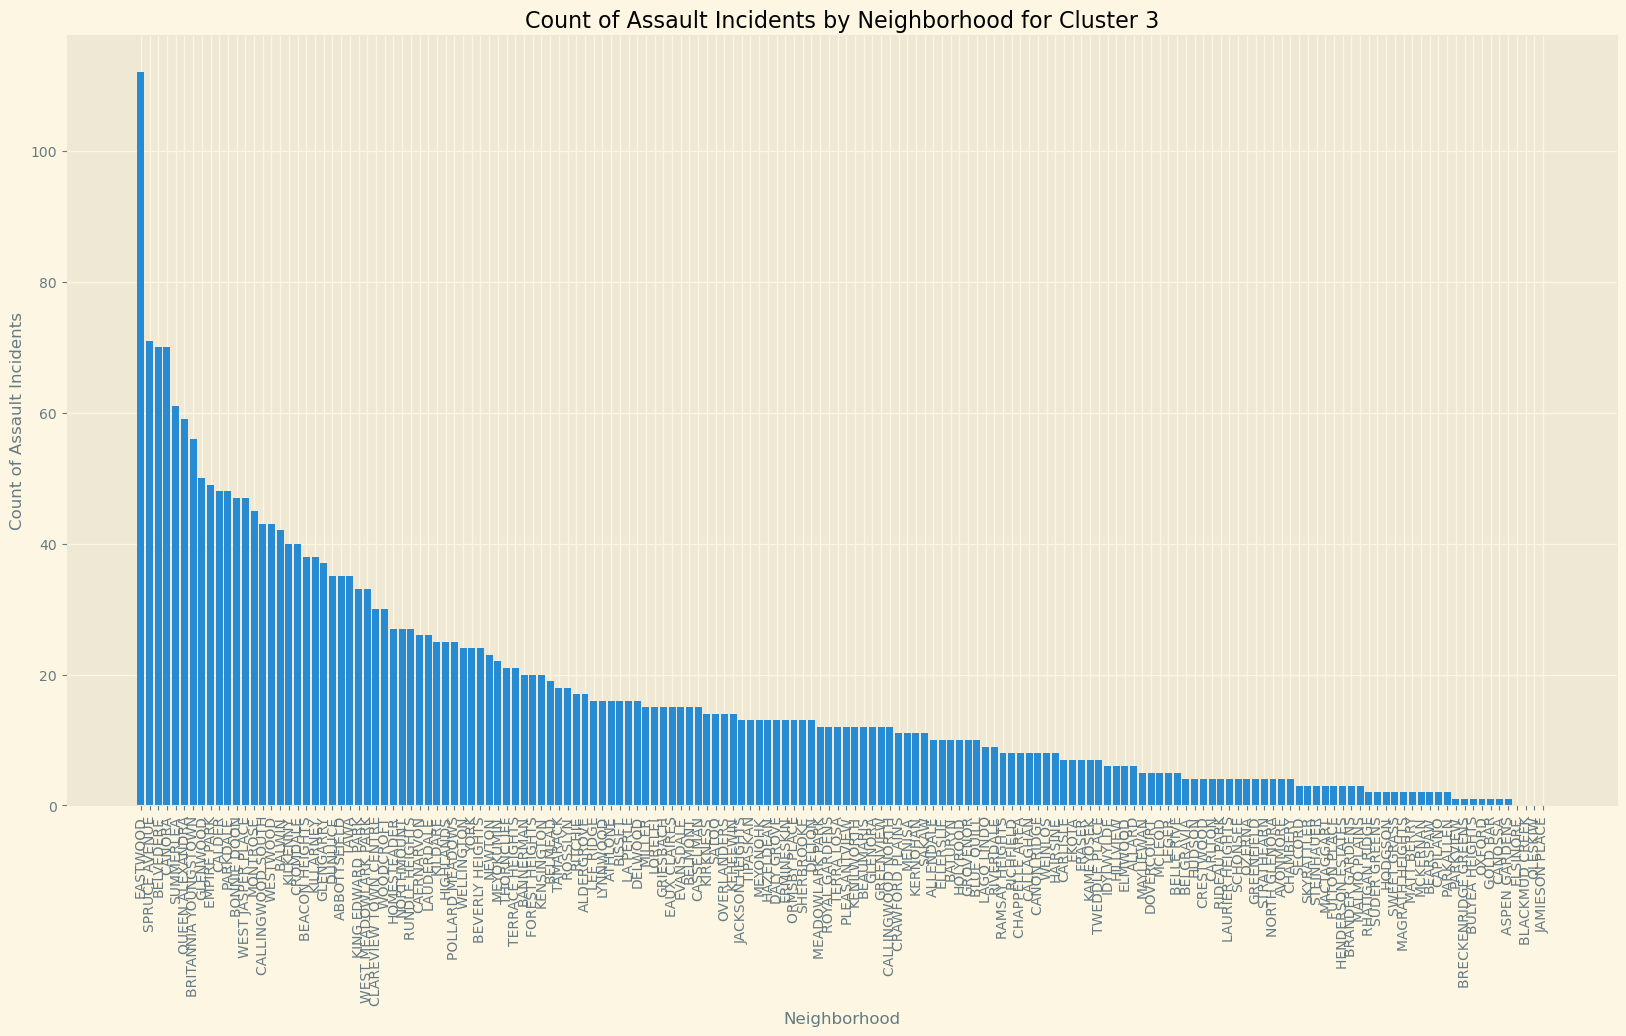

In [190]:

# Select the 'NGH_Name' and 'Assault' columns from the dataframe
assault_data = cluster_3[['NGH_Name', 'Assault']]

# Sort the data by the count of Assaults in descending order
sorted_data = assault_data.sort_values(by='Assault', ascending=False)

# Create a bar plot of the count of Assaults for each neighborhood
plt.figure(figsize=(20, 10))
plt.bar(sorted_data['NGH_Name'], sorted_data['Assault'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Count of Assault Incidents')
plt.title('Count of Assault Incidents by Neighborhood for Cluster 3')
plt.show()

In [220]:
df2.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response', 'Cluster'],
      dtype='object')

Boxplot that compares the distribution of the 'Assault' variable across the 4 clusters. The x-axis will show the 4 clusters and the y-axis will show the values of the 'Assault' variable. The boxplots will show the distribution of the 'Assault' variable for each cluster. We can use this plot to see if there are any differences in the distribution of 'Assault' across the 4 clusters

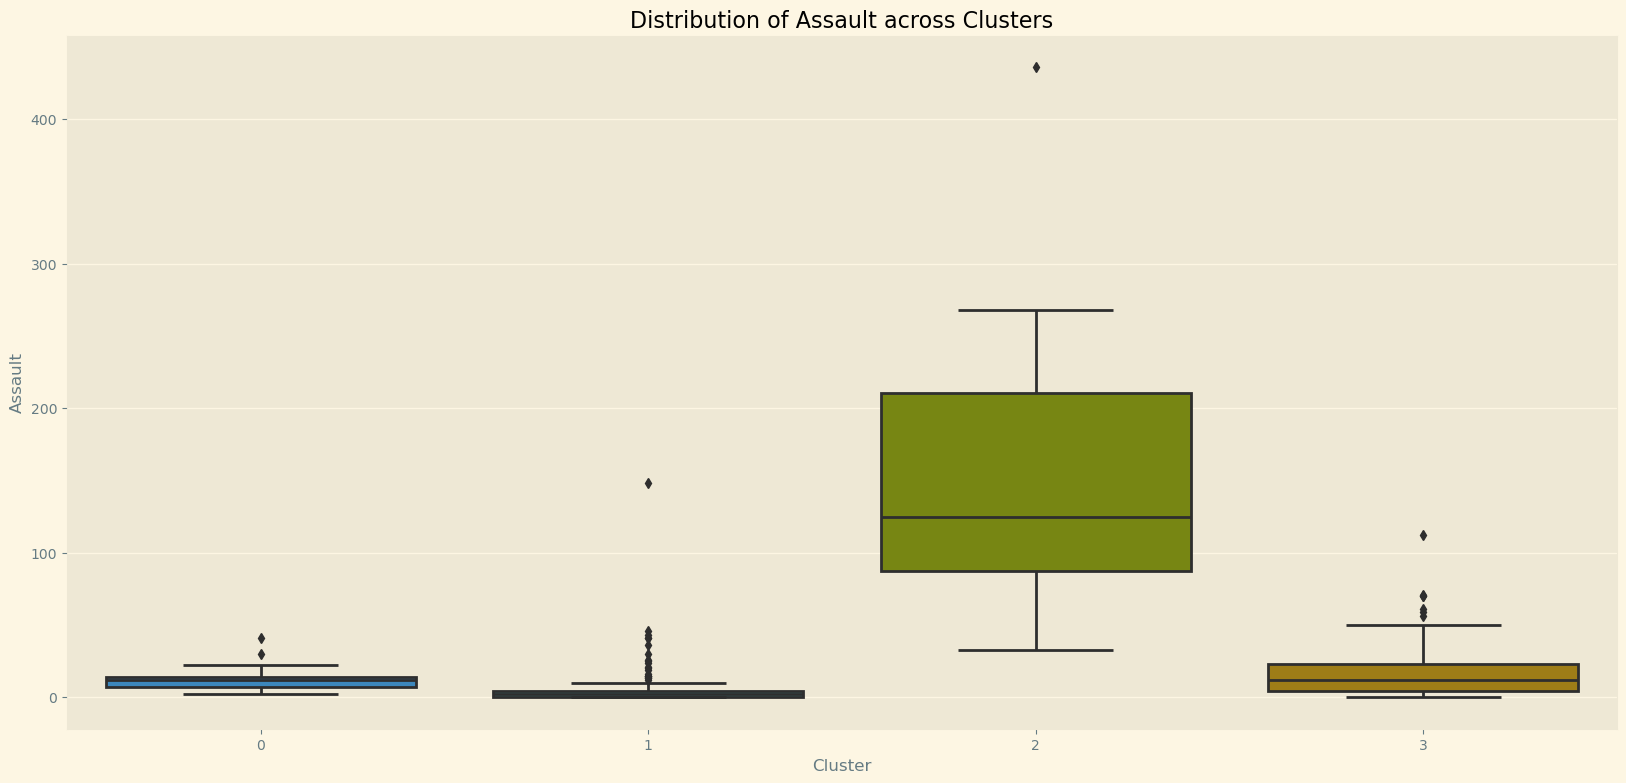

In [222]:
# Create a boxplot of 'Assault' variable for each cluster
sns.boxplot(x='Cluster', y='Assault', data=df2)

# Set the title and axes labels
plt.title('Distribution of Assault across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Assault')
plt.show()

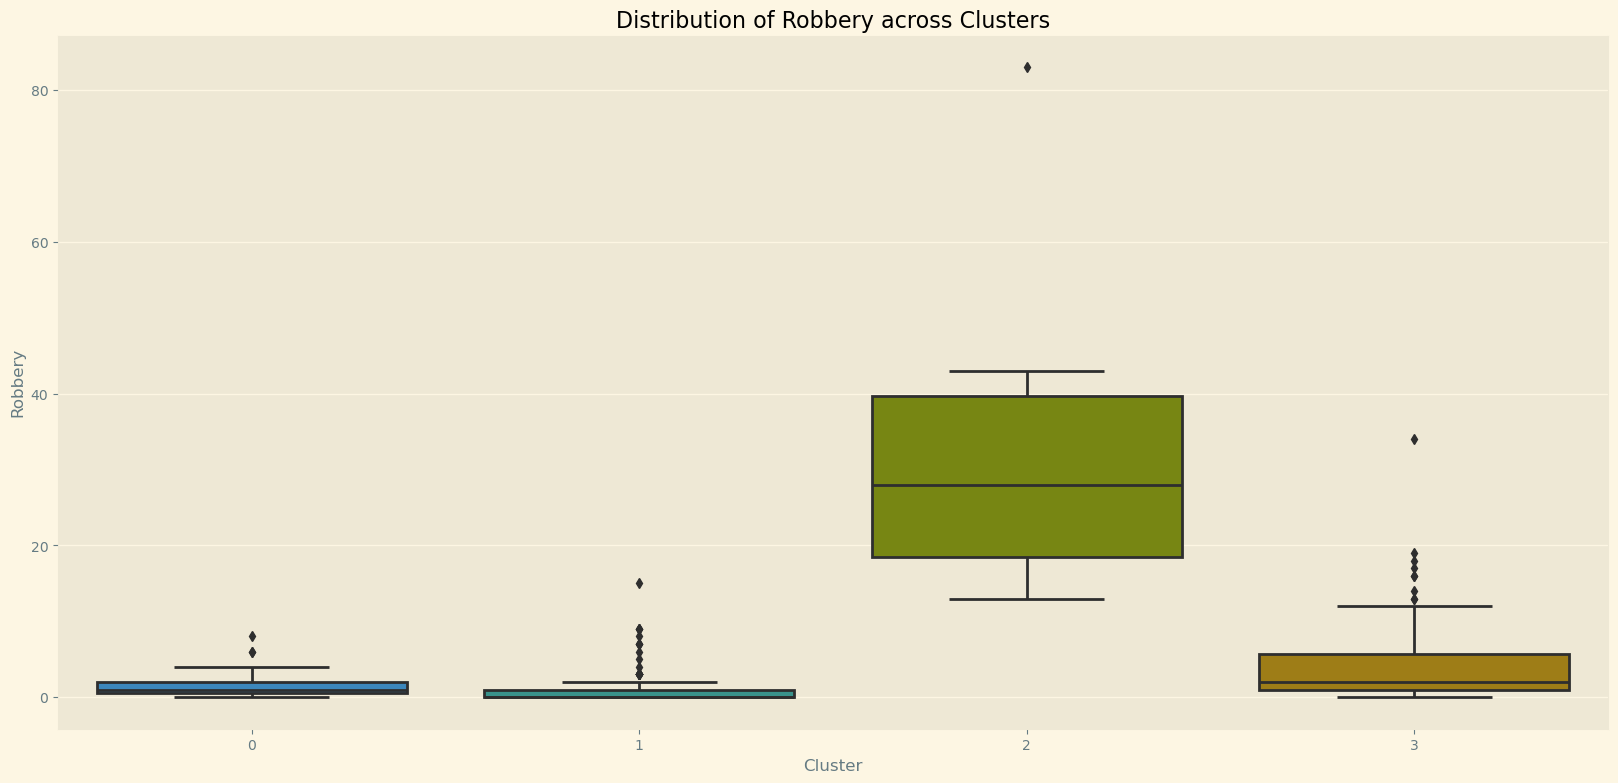

In [223]:
# Create a boxplot of 'Assault' variable for each cluster
sns.boxplot(x='Cluster', y='Robbery', data=df2)

# Set the title and axes labels
plt.title('Distribution of Robbery across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Robbery')
plt.show()

In [231]:
cluster_counts = df2.groupby('Cluster')['Assault'].mean()

In [232]:
cluster_counts

Cluster
0     12.703704
1      5.337143
2    163.700000
3     16.962963
Name: Assault, dtype: float64

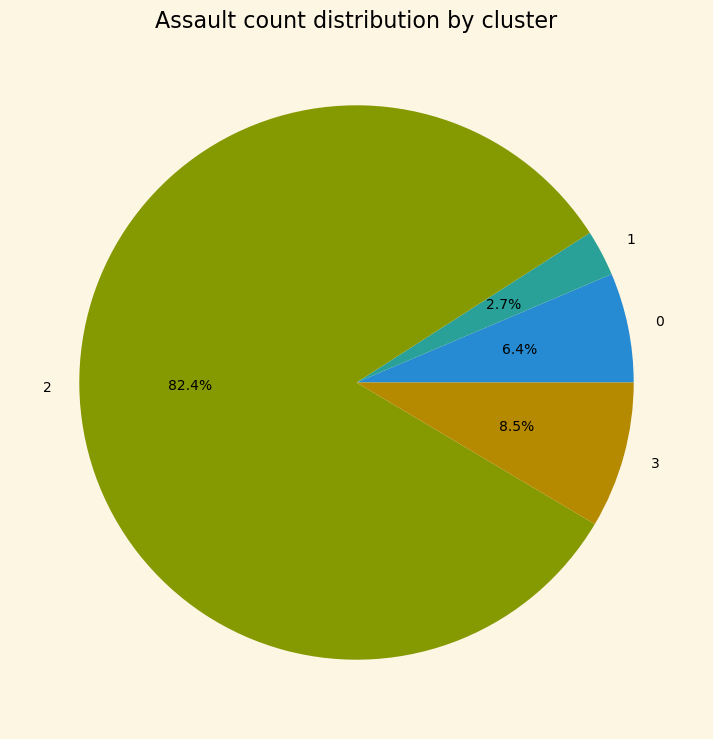

In [233]:
# Calculate the total Assault count for each cluster
cluster_counts = df2.groupby('Cluster')['Assault'].mean()

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
ax.set_title('Assault count distribution by cluster')
plt.show()

 Using mean instead of sum is more appropriate when dealing with proportions. This is because the mean is a measure of central tendency that takes into account the size of each cluster. Using sum would simply add up the total number of assaults in each cluster, which does not give an accurate representation of the proportion of assaults in each cluster.

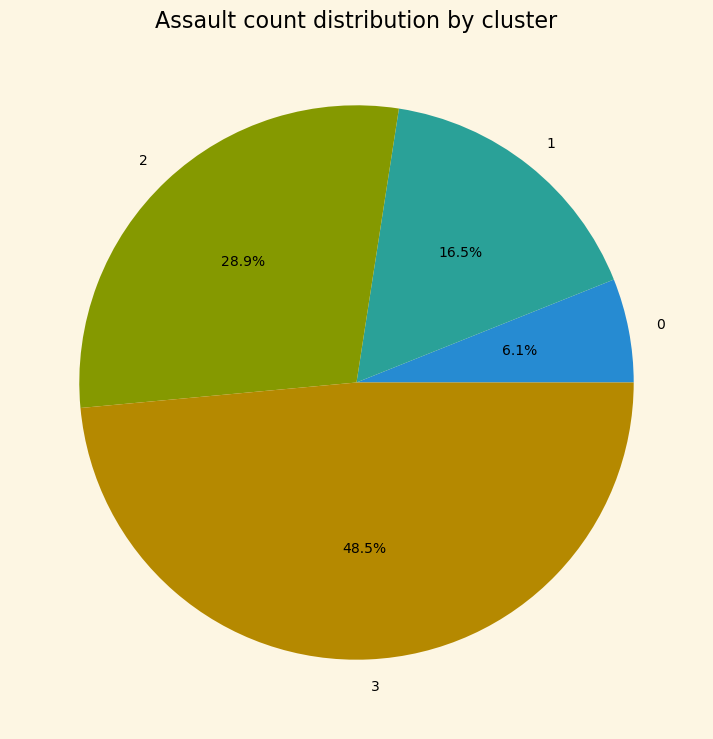

In [234]:
# Calculate the total Assault count for each cluster
cluster_counts = df2.groupby('Cluster')['Assault'].sum()

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
ax.set_title('Assault count distribution by cluster')
plt.show()

The reason for this difference is because @.sum() calculates the total count of Assaults in each cluster, while .mean() calculates the percentage of total Assaults in each cluster relative to the total number of Assaults in the entire dataset.

When using @.sum(), Cluster 3 has the highest count of Assaults (48.5% of total Assaults), which means that this cluster has the most number of Assaults overall. On the other hand, when using .mean(), Cluster 2 has the highest percentage of Assaults (82.4% of total Assaults in the dataset), which means that this cluster has the highest concentration of Assaults relative to the total number of Assaults in the dataset.

In [236]:
df2.columns

Index(['NGH_Name', 'Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000', 'Latitude', 'Longitude', 'Preschool',
       'Kindergarten', 'Gr7-9', 'Gr10-12', 'Post-Secondary', 'Homemaker',
       'Employed 0-30', 'Employed 30+', 'Unemployed', 'Retired',
       'Permanently Unemployed', 'Employment_No Response',
       'Income_Less than $30K', 'Income_30K to less than 60K',
       'Income_60K to less than 100K', 'Income_100K to less than 125K',
       'Income_125K to less than 150K', 'Income_150K to less than 200K',
       'Income_200K to less than 250K', 'Income_250K or more',
       'Income_No Response', 'Cluster'],
      dtype='object')

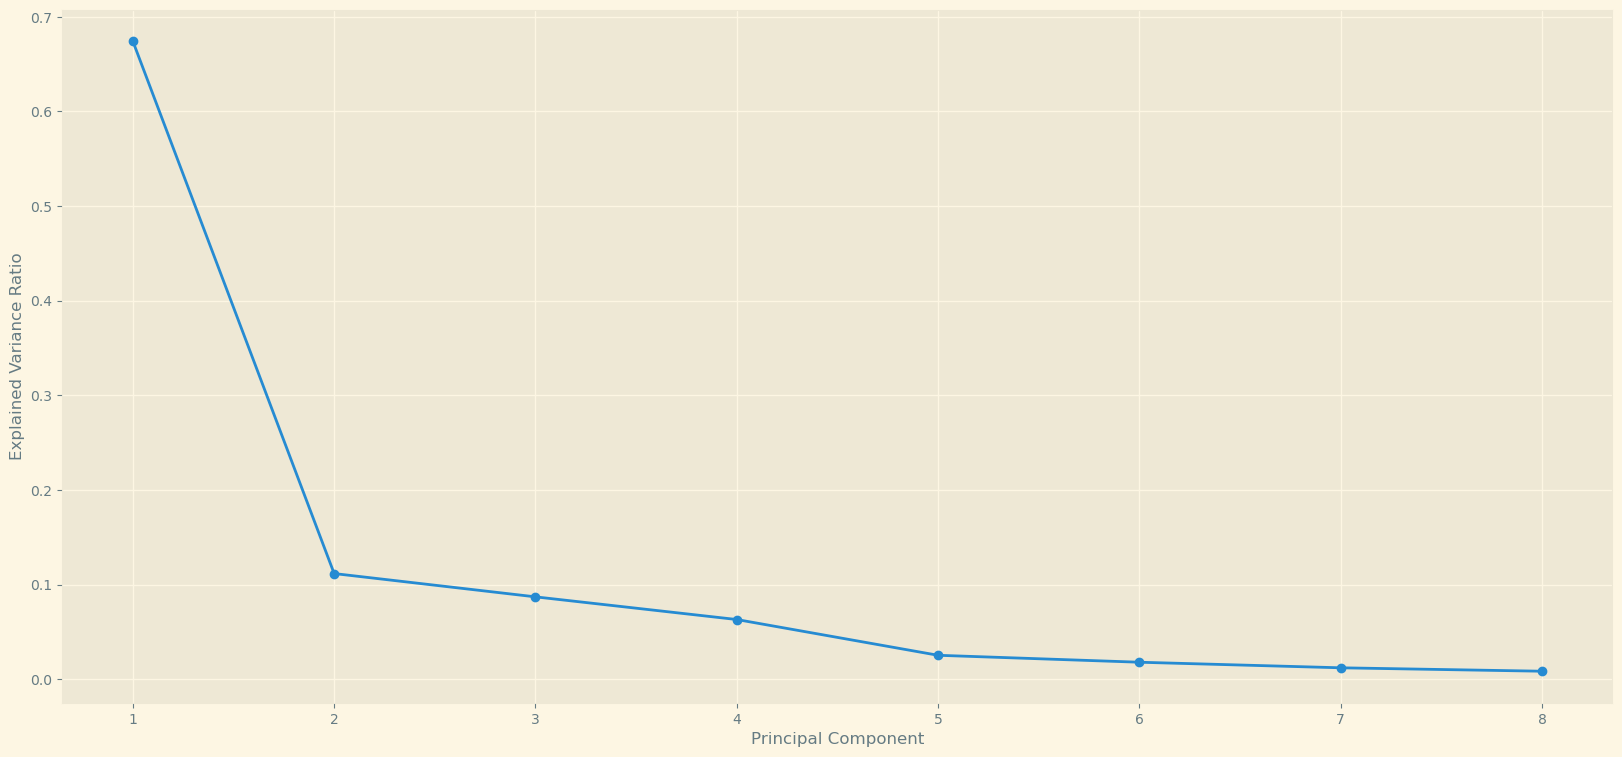

In [237]:
from sklearn.decomposition import PCA

# Select the features to include in the PCA
features = ['Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000']

# Standardize the variables
scaler = StandardScaler()
X = scaler.fit_transform(df2[features])

# Perform the PCA
pca = PCA()
pca.fit(X)

# Plot the explained variance ratio for each principal component
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

For PCA, the number of principal components to retain depends on the variance explained by each component. It is recommended to retain enough principal components to explain at least 70-80% of the total variance in the data. In some cases, this may mean retaining only a few principal components, while in other cases it may mean retaining more.

In your case, since you have 4 clusters, you can start with retaining 2-3 principal components and see how much variance they explain. If they explain a significant amount of variance, you can stop there, otherwise, you may need to retain more components.

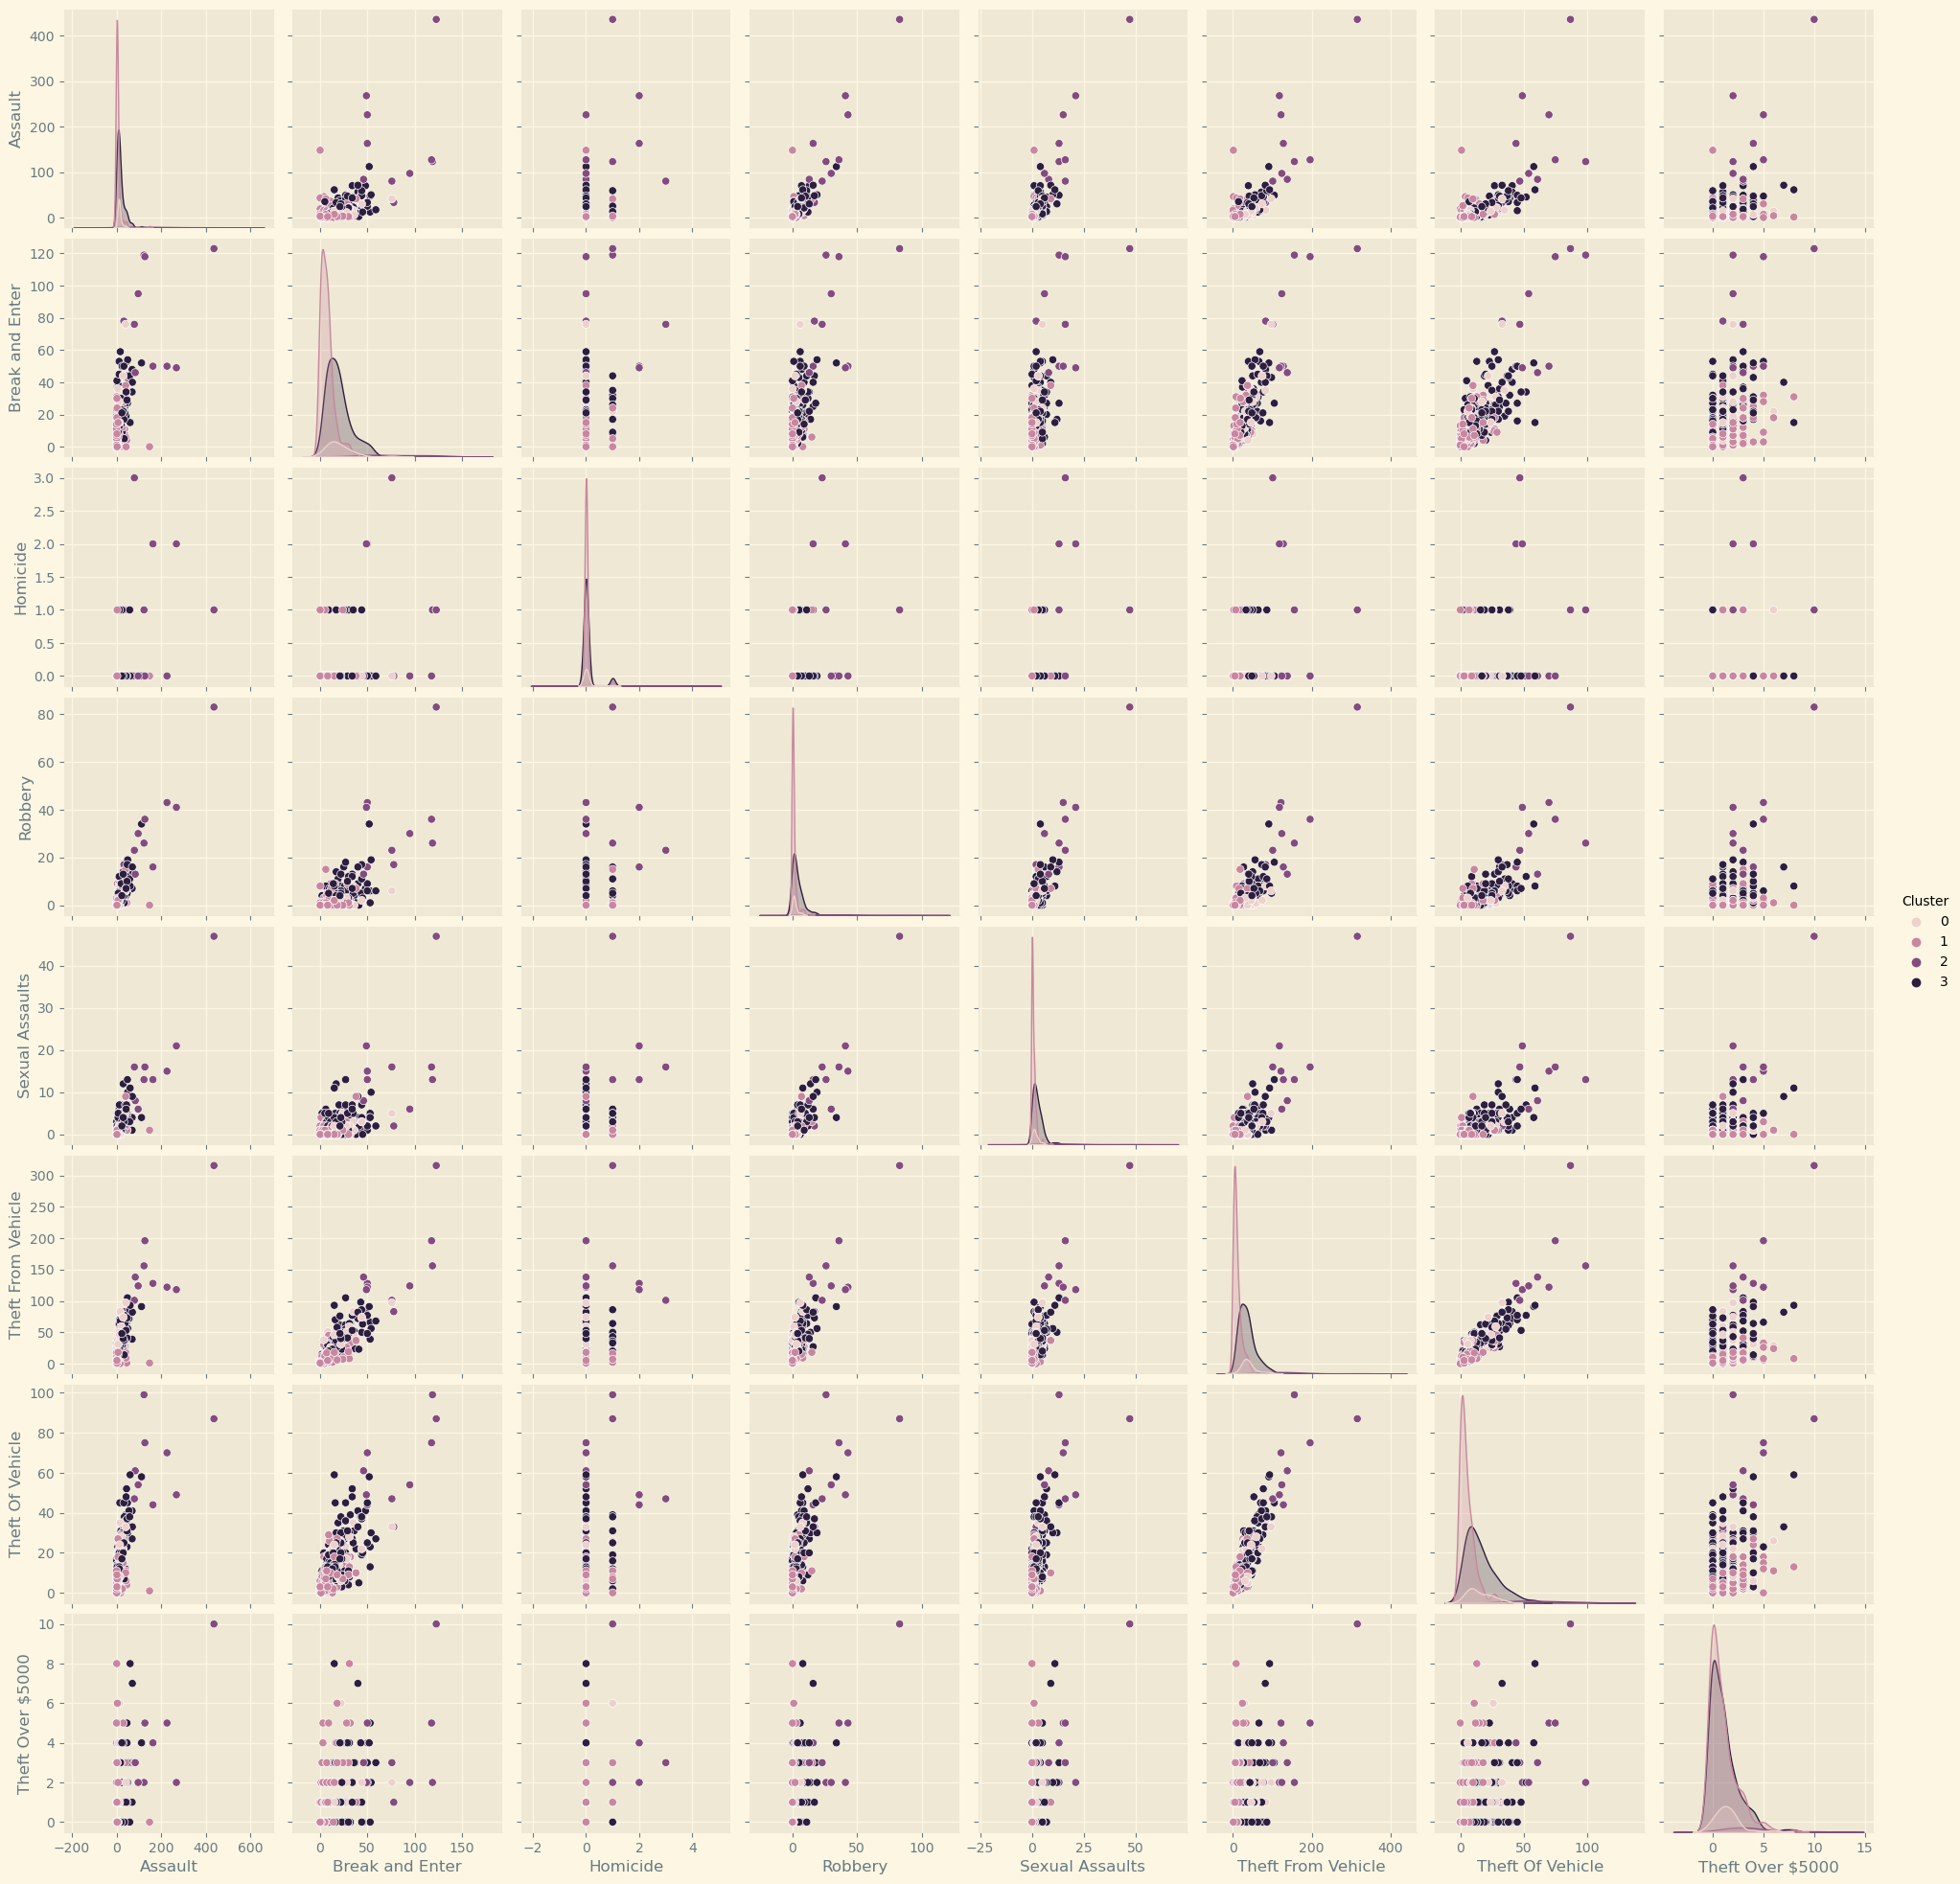

In [239]:
sns.pairplot(df2, hue='Cluster', vars=['Assault', 'Break and Enter', 'Homicide', 'Robbery',
       'Sexual Assaults', 'Theft From Vehicle', 'Theft Of Vehicle',
       'Theft Over $5000'], diag_kind='kde')


Covariance is a measure of the joint variability of two random variables. It measures how two variables are related to each other. If the covariance is positive, it indicates that the two variables tend to vary together in the same direction. If the covariance is negative, it indicates that the two variables tend to vary together in opposite directions.

In the context of the clusters, we can calculate the covariance matrix between the variables in each cluster to understand the relationships between them. The covariance matrix is a square matrix where the diagonal elements represent the variance of each variable and the off-diagonal elements represent the covariances between variables.

We can use the cov() function in Pandas to calculate the covariance matrix between variables. Here's an example code snippet:

In [240]:
# Calculate the covariance matrix for cluster 0
cluster_0_cov = cluster_0.cov()

# Print the covariance matrix
print(cluster_0_cov)

                                   Assault  Break and Enter   Homicide  \
Assault                          68.216524        96.874644   0.049858   
Break and Enter                  96.874644       220.096866   0.054131   
Homicide                          0.049858         0.054131   0.037037   
Robbery                           6.200855        13.521368  -0.029915   
Sexual Assaults                   7.005698        12.373219  -0.019943   
Theft From Vehicle              117.595442       229.309117  -0.430199   
Theft Of Vehicle                 47.988604        79.253561   0.424501   
Theft Over $5000                  0.905983         3.380342   0.175214   
Latitude                          0.007219        -0.165089  -0.001764   
Longitude                         0.163223        -0.060862   0.004647   
Preschool                       228.710826       764.078348  -0.968661   
Kindergarten                     64.311966       649.452991  -3.495726   
Gr7-9                           -52.16

Covariance Matrix Definition
Variance covariance matrix is defined as a square matrix where the diagonal elements represent the variance and the off-diagonal elements represent the covariance. The covariance between two variables can be positive, negative, and zero. A positive covariance indicates that the two variables have a positive relationship whereas negative covariance shows that they have a negative relationship. If two elements do not vary together then they will display a zero covariance.

In [221]:
from scipy.stats import kruskal
# Step 1: Extract the 'Assault' column from the original dataframe
assault = df2['Assault']

# Step 2: Create a new dataframe with only the 'NGH_Name' and 'Assault' columns, filtered for the 4 clusters
cluster_data = df2.loc[df2['Cluster'].isin([0, 1, 2, 3]), ['NGH_Name', 'Assault', 'Cluster']]

# Perform the Kruskal-Wallis test
stat, p = kruskal(
    cluster_data.loc[cluster_data['Cluster'] == 0, 'Assault'],
    cluster_data.loc[cluster_data['Cluster'] == 1, 'Assault'],
    cluster_data.loc[cluster_data['Cluster'] == 2, 'Assault'],
    cluster_data.loc[cluster_data['Cluster'] == 3, 'Assault']
)

print(f'Kruskal-Wallis H-statistic = {stat:.2f}, p-value = {p:.4f}')

Kruskal-Wallis H-statistic = 140.62, p-value = 0.0000


The Kruskal-Wallis H-statistic is a measure of the difference between the median values of the groups being compared. A higher H-statistic value indicates a larger difference between the medians of the groups, which can be interpreted as evidence for the groups being significantly different from each other.

In this case, the H-statistic value of 140.62 and a p-value of 0.0000 indicate that there is a significant difference between the Assault counts of the 4 clusters, and that it is unlikely that this difference is due to chance. Therefore, we can conclude that there is a statistically significant difference in the Assault counts between the 4 clusters in the City of Edmonton.

In [258]:
prop=pd.read_csv('Edmonton Historical Prpty Assmnts.csv')
prop2016=prop[prop['Assessment Year']==2016]
prop2016=prop2016[prop2016['Assessment Class 1']=='RESIDENTIAL']

prop2016.drop(['Suite', 'House Number', 'Account Number','Street Name', 'Legal Description', 'Latitude', 'Longitude', 'Point Location', 'Assessment Year'], axis=1, inplace =True)
prop2016.drop(['Lot Size', 'Assessment Class % 1', 'Assessment Class 2', 'Assessment Class % 2', 'Assessment Class 3', 'Assessment Class % 3', 'Actual Year Built', 'Zoning'], axis=1, inplace =True)
prop2016.rename(columns={'Neighbourhood':'NGH_Name', }, inplace=True)
prop2016

C:\Users\azimi\AppData\Local\Temp\ipykernel_1684\3770090032.py:1: DtypeWarning: Columns (2,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  prop=pd.read_csv('Edmonton Historical Prpty Assmnts.csv')


,NGH_Name,Garage,Assessed Value,Assessment Class 1
35,OLIVER,N,339000.0,RESIDENTIAL
36,GROVENOR,N,98000.0,RESIDENTIAL
50,MACTAGGART,N,76000.0,RESIDENTIAL
74,OLIVER,N,234500.0,RESIDENTIAL
92,QUEEN ALEXANDRA,N,24500.0,RESIDENTIAL
...,...,...,...,...
4103567,DUNLUCE,N,245000.0,RESIDENTIAL
4104885,CRYSTALLINA NERA WEST,Y,264000.0,RESIDENTIAL
4105990,DUNLUCE,N,273500.0,RESIDENTIAL
4106316,TERRACE HEIGHTS,N,7500.0,RESIDENTIAL


In [259]:
prop2016['NGH_Name'].value_counts()

OLIVER                       11254
DOWNTOWN                      8068
RUTHERFORD                    5093
WINDERMERE                    5033
SOUTH TERWILLEGAR             4875
                             ...  
GAGNON ESTATE INDUSTRIAL         1
STRATHCONA JUNCTION              1
WEST SHEFFIELD INDUSTRIAL        1
MORRIS INDUSTRIAL                1
BROWN INDUSTRIAL                 1
Name: NGH_Name, Length: 345, dtype: int64

In [260]:
prop2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357157 entries, 35 to 4107627
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NGH_Name            357157 non-null  object 
 1   Garage              357157 non-null  object 
 2   Assessed Value      357157 non-null  float64
 3   Assessment Class 1  357157 non-null  object 
dtypes: float64(1), object(3)
memory usage: 13.6+ MB


In [261]:
prop2016.isnull().sum()


NGH_Name              0
Garage                0
Assessed Value        0
Assessment Class 1    0
dtype: int64

In [262]:
prop2016_agg = prop2016.groupby('NGH_Name').agg({'Assessed Value': 'mean'})
prop2016_agg

,Assessed Value
NGH_Name,
ABBOTTSFIELD,169735.372340
ALBANY,225948.717949
ALBERTA AVENUE,237084.116140
ALDERGROVE,323880.688807
ALLARD,370119.635193
...,...
WINTERBURN INDUSTRIAL AREA WEST,127236.714976
WOODCROFT,304044.554455
YELLOWHEAD CORRIDOR EAST,197000.000000


In [264]:
# Merge df2 and prop2016_agg on NGH_Name
merged_df = pd.merge(df2, prop2016_agg, on='NGH_Name', how='left')

# Display the first few rows of the merged dataframe
merged_df.isnull().sum()


49

In [265]:
null_values = merged_df[merged_df['Assessed Value'].isnull()]['NGH_Name']
null_values

3                     ALBERTA PARK INDUSTRIAL
14                  ANTHONY HENDAY SOUTH EAST
18                       ARMSTRONG INDUSTRIAL
40                            BLATCHFORD AREA
43                     BONAVENTURE INDUSTRIAL
55                        CALGARY TRAIL NORTH
56                        CALGARY TRAIL SOUTH
65                 CARLETON SQUARE INDUSTRIAL
79                CORONET ADDITION INDUSTRIAL
80                         CORONET INDUSTRIAL
89                     DAVIES INDUSTRIAL EAST
95                        DOMINION INDUSTRIAL
101                    EASTGATE BUSINESS PARK
106                       EDMISTON INDUSTRIAL
109    EDMONTON RESEARCH AND DEVELOPMENT PARK
128                        GARSIDE INDUSTRIAL
133                       GLENRIDDING HEIGHTS
148              HAWIN PARK ESTATE INDUSTRIAL
164            HUFF BREMNER ESTATE INDUSTRIAL
188                        LAMBTON INDUSTRIAL
211                       MCARTHUR INDUSTRIAL
214                       MCINTYRE

In [266]:
merged_df.dropna(inplace=True)

In [268]:
merged_df

,NGH_Name,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,Theft Over $5000,Latitude,...,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response,Cluster,Assessed Value
0,ABBOTTSFIELD,35,8,0,8,4,16,6,0,53.574143,...,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0,3,169735.372340
1,ALBANY,8,8,0,2,2,9,2,1,53.632382,...,56.0,63.0,30.0,9.0,14.0,13.0,3.0,350.0,1,225948.717949
2,ALBERTA AVENUE,123,119,1,26,13,156,99,2,53.568485,...,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0,2,237084.116140
4,ALDERGROVE,17,19,0,6,4,46,23,0,53.516888,...,266.0,284.0,135.0,72.0,49.0,22.0,12.0,952.0,3,323880.688807
5,ALLARD,6,17,0,1,0,12,3,4,53.401301,...,48.0,165.0,109.0,48.0,69.0,32.0,23.0,560.0,3,370119.635193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,WINTERBURN INDUSTRIAL AREA WEST,2,18,0,0,0,6,9,3,53.562804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1,127236.714976
369,WOODCROFT,30,22,0,13,4,40,20,4,53.564595,...,121.0,107.0,32.0,24.0,29.0,6.0,5.0,642.0,3,304044.554455
370,YELLOWHEAD CORRIDOR EAST,7,15,0,2,0,18,18,2,53.579205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,197000.000000
372,YORK,24,21,0,4,2,48,17,4,53.602843,...,297.0,271.0,103.0,65.0,42.0,14.0,5.0,510.0,3,275919.520548


In [271]:
merged_df['Assessed Value'].describe()

count    3.250000e+02
mean     3.709244e+05
std      2.477898e+05
min      5.000000e+02
25%      2.670297e+05
50%      3.238807e+05
75%      4.101587e+05
max      2.259944e+06
Name: Assessed Value, dtype: float64

In [273]:
# Using Geopandas
# first need to get out edmonton/neighbourhoods shape file..and change the columns to match our datafile
#https://data.edmonton.ca/Geospatial-Boundaries/2016-Federal-Census-Neighbourhoods-as-of-Official-/3did-mjnj
edmonton_shp2=gpd.read_file('geo_export_67517c45-71c1-4f9b-8051-9eaf76457140.shp', geometry='geometry')
edmonton_shp2.rename(columns={'name': 'NGH_Name', 'neighbourh': 'NGH_Number'}, inplace=True)
edmonton_shp2.drop(['descriptiv', 'date_effec', 'time_effec', 'date_eff_2', 'time_eff_2', 'descriptio'], axis=1, inplace =True)
edmonton_shp2.head()

,NGH_Number,NGH_Name,geometry
0,5310.0,PARKALLEN,"POLYGON ((-113.52294 53.50390, -113.52299 53.5..."
1,4400.0,PLACE LARUE,"POLYGON ((-113.63538 53.53748, -113.63986 53.5..."
2,5170.0,EMPIRE PARK,"POLYGON ((-113.49897 53.48824, -113.49765 53.4..."
3,2270.0,EVERGREEN,"POLYGON ((-113.35656 53.62863, -113.35664 53.6..."
4,5520.0,UNIVERSITY OF ALBERTA,"POLYGON ((-113.51500 53.52575, -113.51500 53.5..."


In [275]:
merge_shape=edmonton_shp2.merge(merged_df, on='NGH_Name', how='left')
# Drop the null values
merge_shape=merge_shape.dropna()

In [276]:
merge_shape

,NGH_Number,NGH_Name,geometry,Assault,Break and Enter,Homicide,Robbery,Sexual Assaults,Theft From Vehicle,Theft Of Vehicle,...,Income_30K to less than 60K,Income_60K to less than 100K,Income_100K to less than 125K,Income_125K to less than 150K,Income_150K to less than 200K,Income_200K to less than 250K,Income_250K or more,Income_No Response,Cluster,Assessed Value
0,5310.0,PARKALLEN,"POLYGON ((-113.52294 53.50390, -113.52299 53.5...",2.0,22.0,0.0,2.0,0.0,33.0,6.0,...,127.0,147.0,73.0,52.0,47.0,28.0,27.0,500.0,3.0,398348.469388
2,5170.0,EMPIRE PARK,"POLYGON ((-113.49897 53.48824, -113.49765 53.4...",49.0,27.0,0.0,18.0,13.0,105.0,45.0,...,385.0,345.0,79.0,19.0,10.0,3.0,1.0,1330.0,3.0,172865.659777
3,2270.0,EVERGREEN,"POLYGON ((-113.35656 53.62863, -113.35664 53.6...",8.0,0.0,0.0,0.0,1.0,6.0,2.0,...,87.0,55.0,26.0,14.0,3.0,2.0,0.0,439.0,1.0,64253.956835
5,1010.0,ALBERTA AVENUE,"POLYGON ((-113.49226 53.57662, -113.49042 53.5...",123.0,119.0,1.0,26.0,13.0,156.0,99.0,...,667.0,364.0,139.0,62.0,61.0,11.0,4.0,1138.0,2.0,237084.116140
6,2290.0,GLENGARRY,"POLYGON ((-113.49192 53.59677, -113.49207 53.5...",37.0,21.0,0.0,8.0,5.0,76.0,29.0,...,149.0,128.0,59.0,21.0,26.0,6.0,2.0,650.0,3.0,255469.532554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2120.0,CANON RIDGE,"POLYGON ((-113.38290 53.57633, -113.38265 53.5...",8.0,12.0,0.0,0.0,3.0,35.0,15.0,...,125.0,139.0,109.0,72.0,31.0,9.0,1.0,516.0,3.0,144035.039610
382,2280.0,FRASER,"POLYGON ((-113.36298 53.61571, -113.36277 53.6...",7.0,8.0,0.0,0.0,1.0,35.0,7.0,...,157.0,190.0,104.0,53.0,49.0,16.0,15.0,607.0,3.0,306136.052090
383,6230.0,FOREST HEIGHTS,"POLYGON ((-113.44645 53.54312, -113.44557 53.5...",20.0,36.0,0.0,4.0,3.0,52.0,31.0,...,240.0,262.0,102.0,61.0,89.0,37.0,52.0,855.0,3.0,404505.825243
384,4473.0,HAWKS RIDGE,"POLYGON ((-113.71188 53.58478, -113.71188 53.5...",0.0,4.0,0.0,0.0,0.0,2.0,1.0,...,76.0,27.0,11.0,15.0,14.0,3.0,1.0,17.0,1.0,348281.524927


In [277]:
import folium
from folium.plugins import HeatMap

# Create a new folium map centered at Edmonton
map_edmonton = folium.Map(location=[53.5461, -113.4938], zoom_start=12)

# Plot a heatmap of the Assessed Value column from the merged dataframe
HeatMap(data=merged_df[['Latitude', 'Longitude', 'Assessed Value']].dropna(),
        name='Assessed Value',
        max_val=merged_df['Assessed Value'].max(),
        min_opacity=0.2,
        radius=15,
        blur=10,
        gradient={.4: 'blue', .6: 'cyan', .8: 'lime', 1: 'yellow'},
        overlay=True,
        control=True,
       ).add_to(map_edmonton)

# Add a layer control to the map
folium.LayerControl().add_to(map_edmonton)

# Display the map
map_edmonton

C:\Users\azimi\AppData\Local\Temp\ipykernel_1684\3428289934.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(data=merged_df[['Latitude', 'Longitude', 'Assessed Value']].dropna(),


In [272]:
edmonton_shp

,NGH_Number,NGH_Name,descriptiv,date_effec,time_effec,date_eff_2,time_eff_2,descriptio,geometry,Assessed Value
